# Chapter 7 - R Exercises

In [1]:
library(tidyverse)
library(bayesrules)
library(bayesplot)
library(rstan)
library(grid)
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
This is bayesplot version 1.10.0

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting

Loading required package: StanHeaders

rstan (Version 2.21.8, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recomp

## Exercise 7.6

### a)

In [2]:
lambda = 4.6
set.seed(84735)
rnorm( 1, mean=lambda, sd=2 )

[1] 5.934465

### b)

In [3]:
lambda = 2.1
set.seed(84735)
rnorm( 1, mean=lambda, sd=7 )

[1] 6.770629

### c)

In [4]:
lambda = 8.9
set.seed(84735)
runif(1, min=lambda-2, max=lambda+2)

[1] 9.890753

### d)

In [5]:
lambda = 1.2
set.seed(84735)
runif(1, min=lambda-0.5, max=lambda+0.5)

[1] 1.447688

### e)

In [6]:
lambda = 7.7
set.seed(84735)
runif(1, min=lambda-3, max=lambda+3)

[1] 9.18613

## Exercise 7.7

$$\alpha = \min\left(1, \frac{f(\mu') \, L(\mu'|y)}{f(\mu) \, L(\mu|y) } \; \frac{q(\mu|\mu')}{q(\mu'|\mu)} \right)$$

In [7]:
lambda = 2
lambda2 = 2.1

### a)

Plot of unnormalized posterior:

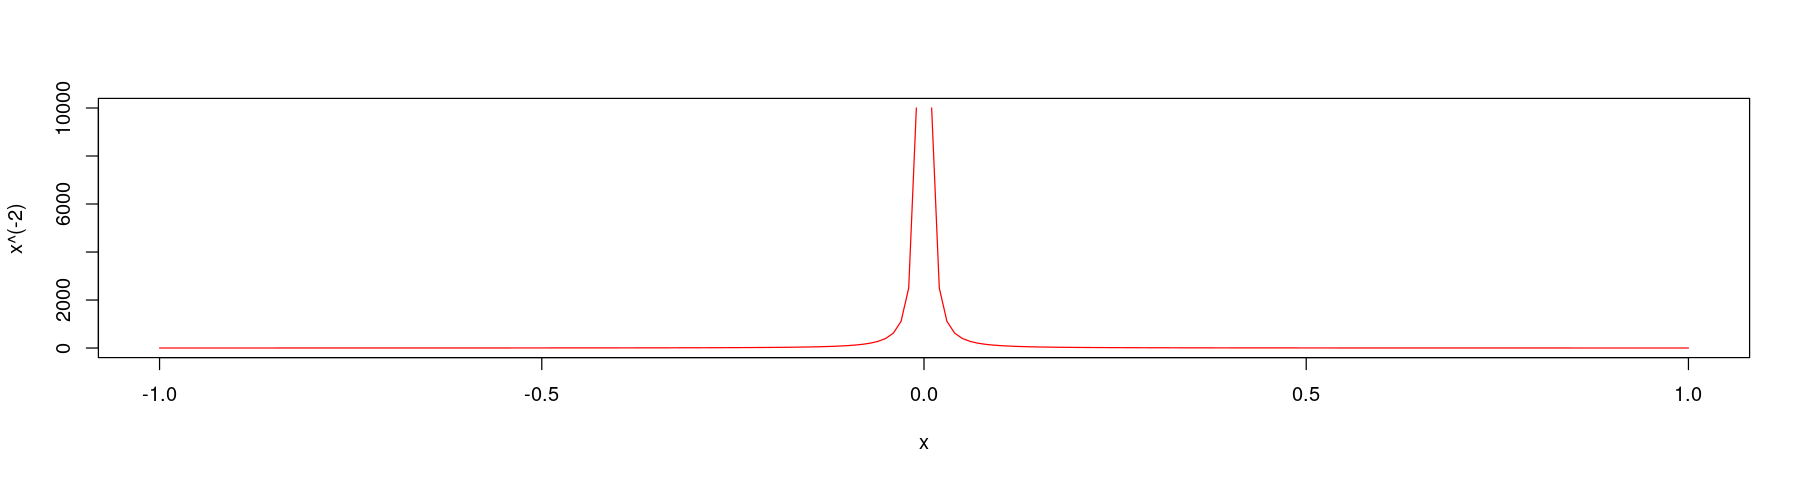

In [8]:
options(repr.plot.width=15, repr.plot.height=4)
x <- seq(-1,1,0.01)
plot(x, x^(-2), type="l", col="red")

Acceptance rate:

In [9]:
lambda^2 / lambda2^2

[1] 0.9070295

### b)

Plot of unnormalized posterior:

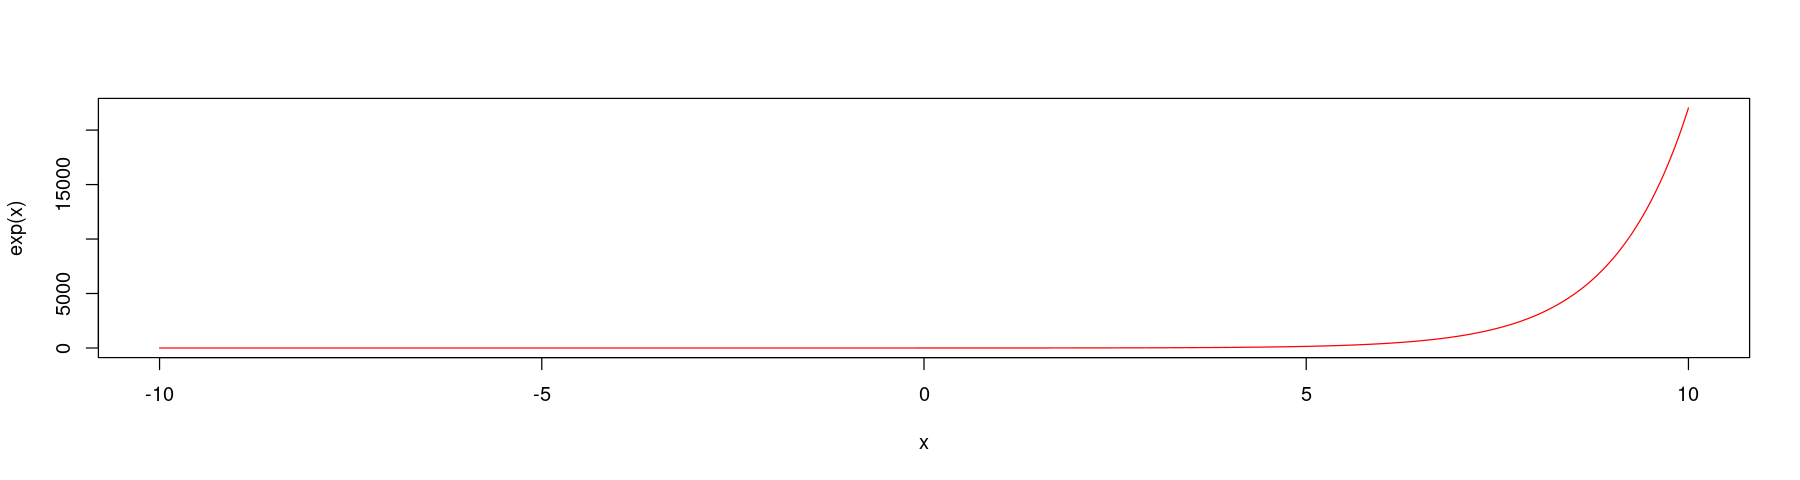

In [10]:
x <- seq(-10,10,0.01)
plot(x, exp(x), type="l", col="red")

Acceptance rate:

In [11]:
exp(lambda2) / exp(lambda)

[1] 1.105171

### c)

Plot of unnormalized posterior:

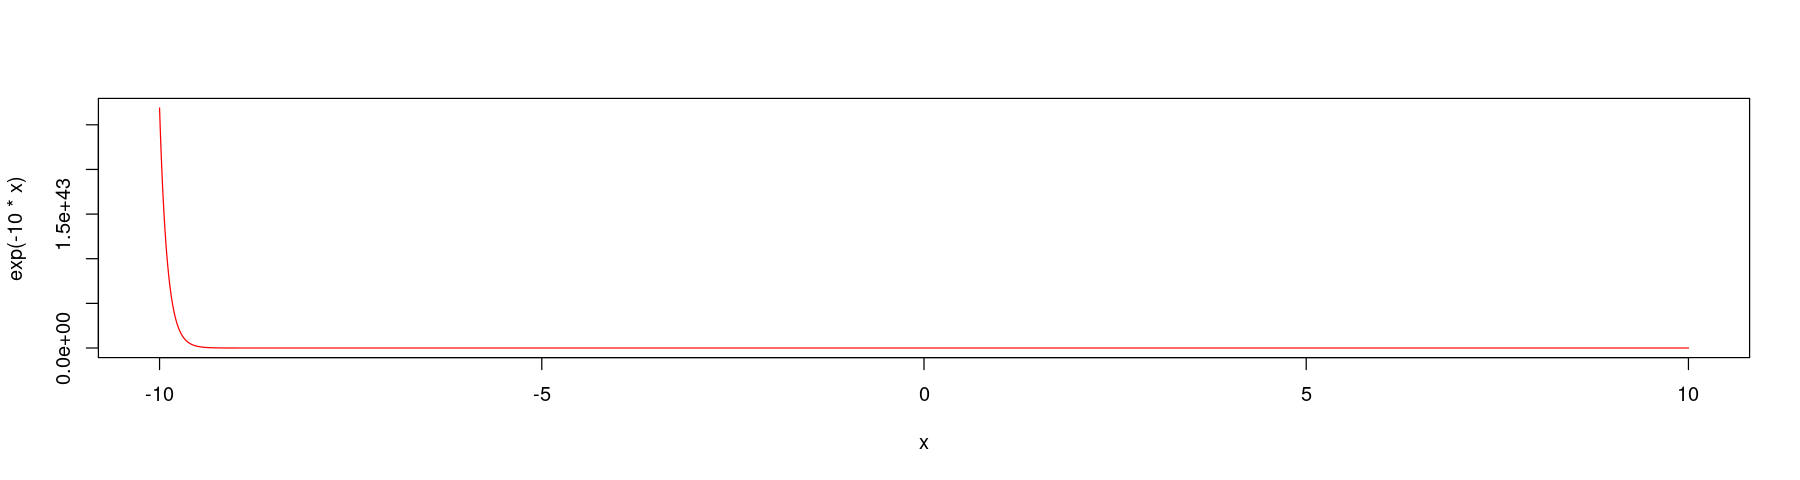

In [12]:
x <- seq(-10,10,0.01)
plot(x, exp(-10*x), type="l", col="red")

Acceptance rate:

In [13]:
exp(-10*lambda2) / exp(-10*lambda)

[1] 0.3678794

### d)

Plot of unnormalized posterior:

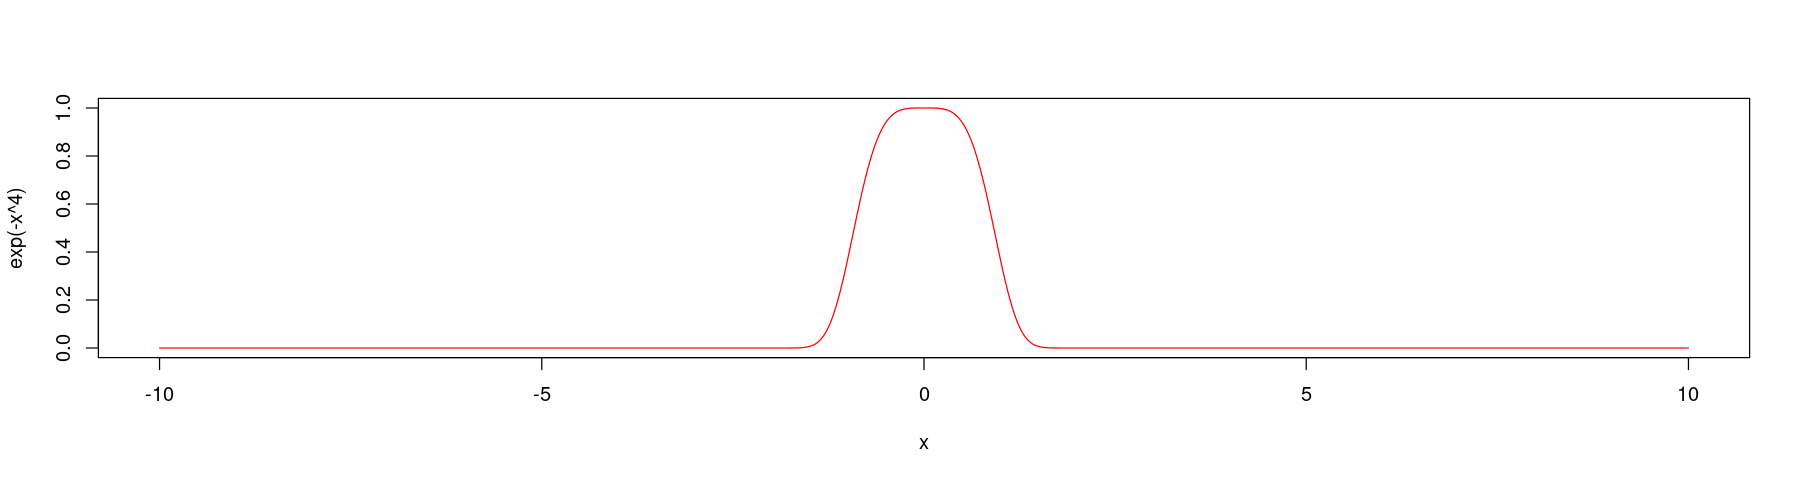

In [14]:
x <- seq(-10,10,0.01)
plot(x, exp(-x^4), type="l", col="red")

Acceptance rate:

In [15]:
exp(-lambda2^4) / exp(-lambda^4) * (lambda2/lambda)

[1] 0.03339631

## Exercise 7.8

In [16]:
lambda = 1.8
lambda2 = 1.6

### a)

Plot of unnormalized posterior:

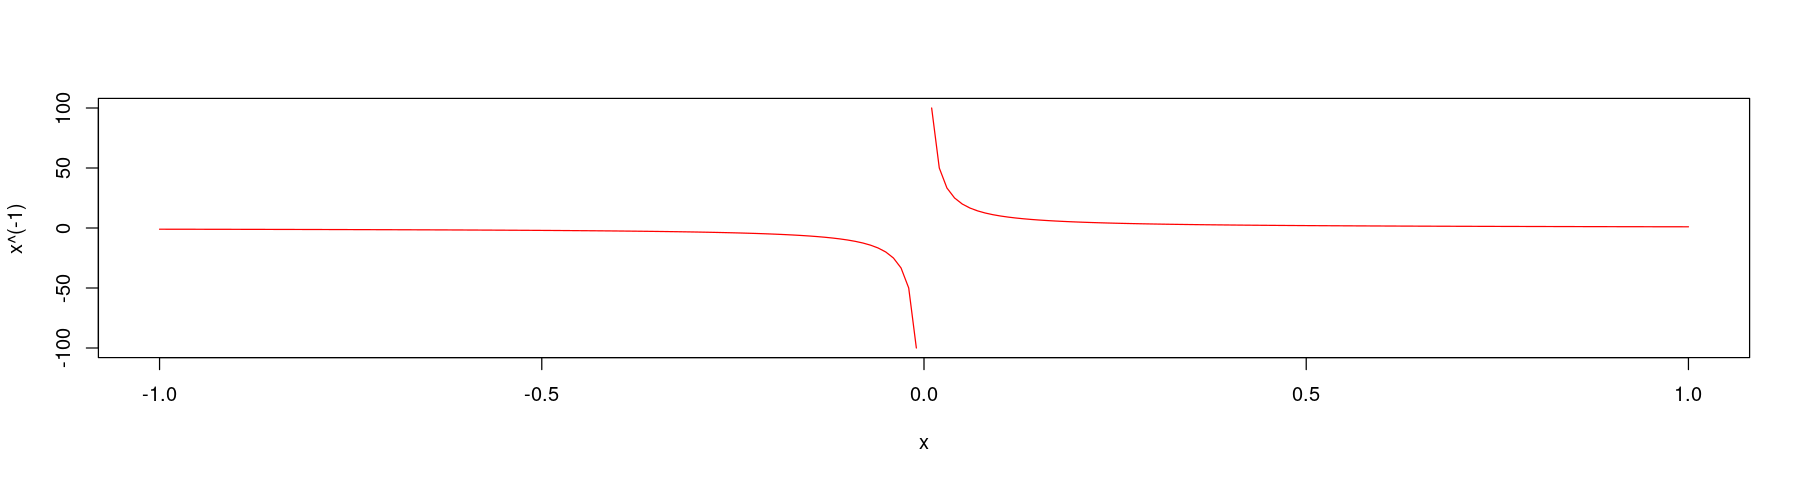

In [17]:
options(repr.plot.width=15, repr.plot.height=4)
x <- seq(-1,1,0.01)
plot(x, x^(-1), type="l", col="red")

Acceptance rate:

In [18]:
lambda/lambda2

[1] 1.125

### b)

Plot of unnormalized posterior:

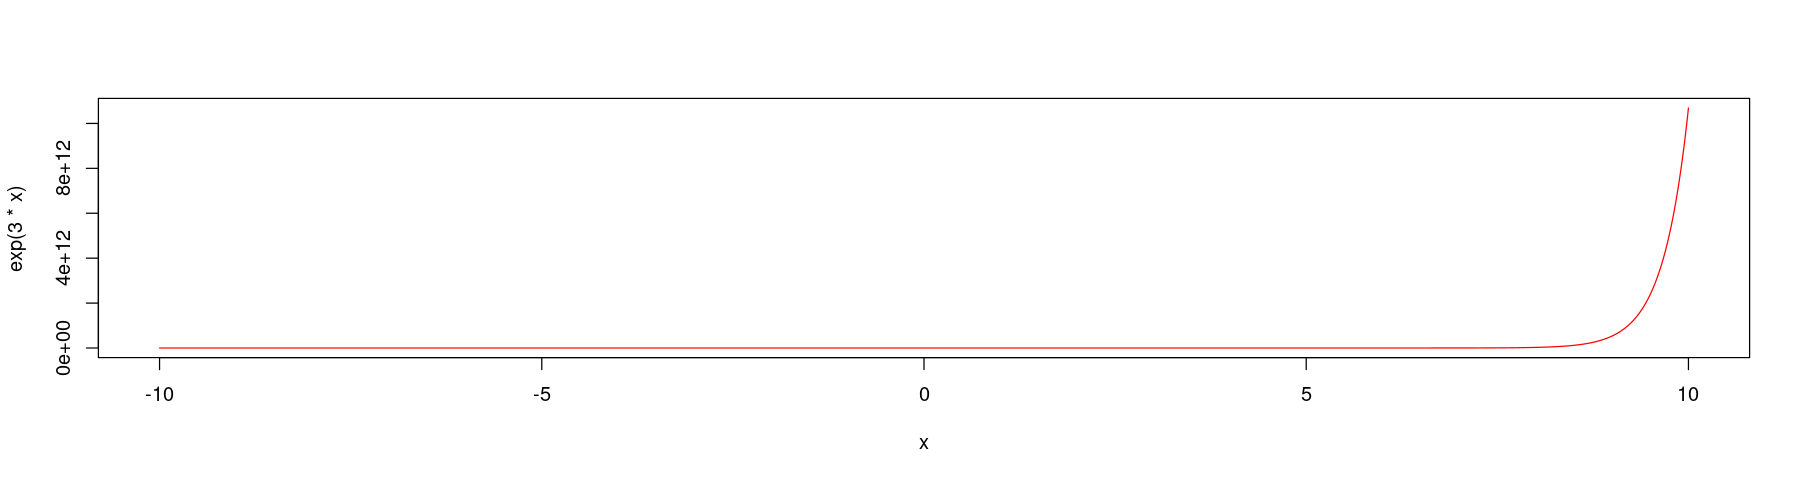

In [19]:
x <- seq(-10,10,0.01)
plot(x, exp(3*x), type="l", col="red")

Acceptance rate:

In [20]:
exp(3*lambda2) / exp(3*lambda)

[1] 0.5488116

### c)

Plot of unnormalized posterior:

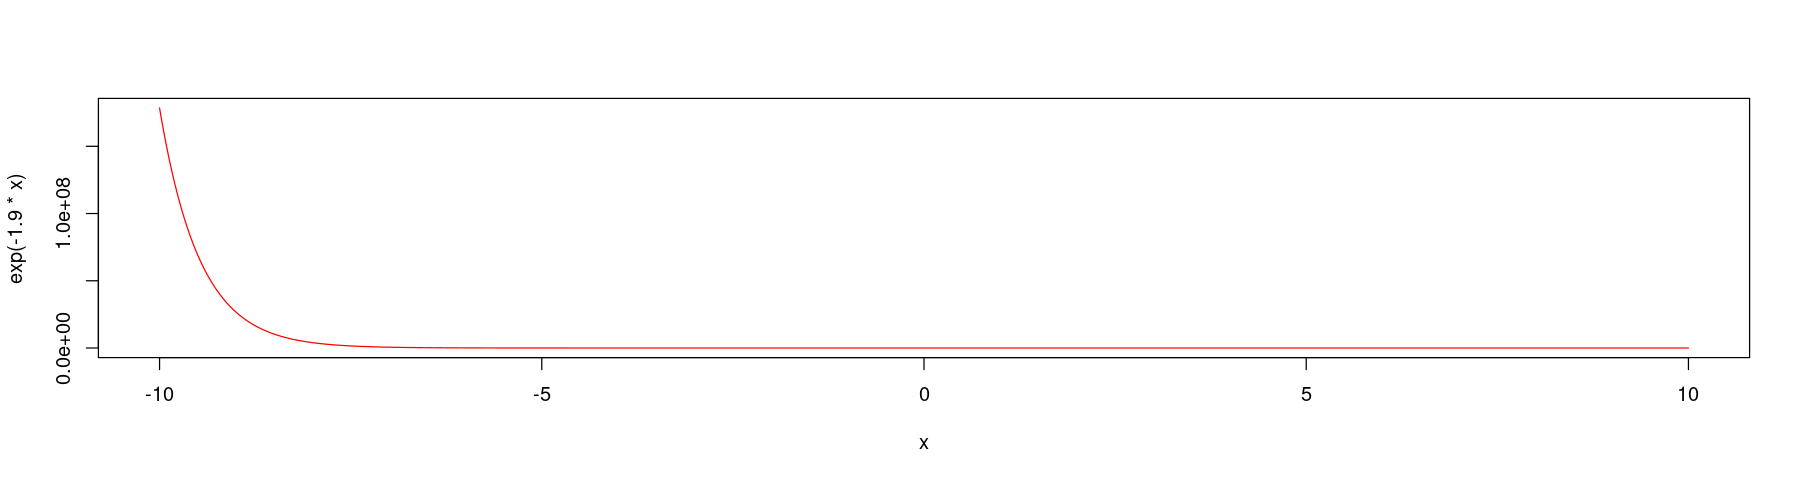

In [21]:
x <- seq(-10,10,0.01)
plot(x, exp(-1.9*x), type="l", col="red")

Acceptance rate:

In [22]:
exp(-1.9*lambda2) / exp(-1.9*lambda)

[1] 1.462285

### d)

Plot of unnormalized posterior:

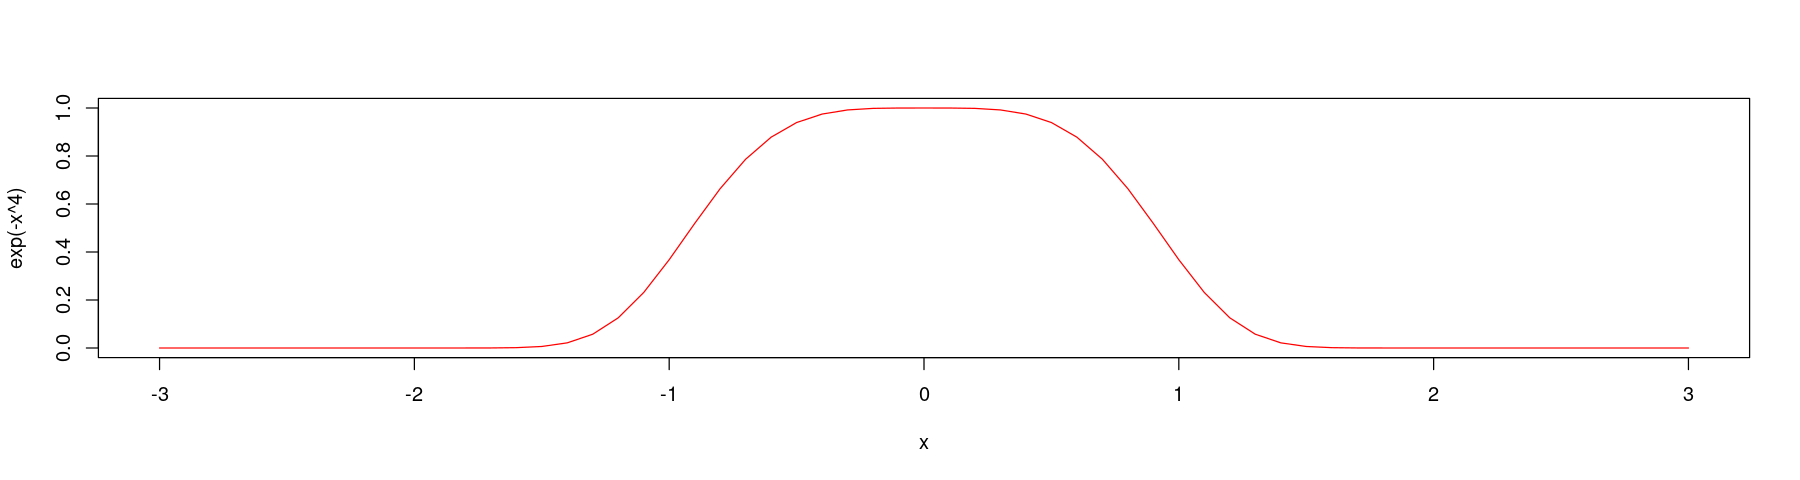

In [23]:
x <- seq(-3,3,0.1)
plot(x, exp(-x^4), type="l", col="red")

Acceptance rate:

In [24]:
exp(-lambda2^4) / exp(-lambda^4) * (lambda2/lambda)

[1] 45.88861

## Exercise 7.9

In [25]:
one_mh_iteration <- function(w, current){
    # STEP 1: Propose the next chain location
     proposal <- runif(1, min = current - w, max = current + w)
  
     # STEP 2: Decide whether or not to go there
     proposal_plaus <- dnorm(proposal, 0, 1) * dnorm(6.25, proposal, 0.75)
     current_plaus  <- dnorm(current, 0, 1) * dnorm(6.25, current, 0.75)
     alpha <- min(1, proposal_plaus / current_plaus)
     next_stop <- sample(c(proposal, current), size = 1, prob = c(alpha, 1-alpha))
  
     # Return the results
     return(data.frame(proposal, alpha, next_stop))
}

### a)

In [26]:
set.seed(1)
one_mh_iteration( w=0.01, current=3 )

proposal alpha    next_stop
1 2.99531  0.987027 2.99531

The acceptance probability $\alpha=0.987$ is extremely high. The proposed jump was accepted. Since $w$ is very small, the new location is extremely close to the old location.

### b)

In [27]:
set.seed(1)
one_mh_iteration( w=0.5, current=3 )

proposal alpha    next_stop
1 2.765509 0.483002 3

With the wider $w$, a location a bit further away from $3$ was proposed, leading to an acceptance probability of $\alpha=0.483$. The algorithm has rejected the jump.

### c)

In [28]:
set.seed(1)
one_mh_iteration( w=1, current=3 )

proposal alpha    next_stop
1 2.531017 0.200246 3

The proposed location is now even further away, with a lower acceptance probability of $\alpha=0.2$. The algorithm has rejected the jump.

### d)

In [29]:
set.seed(1)
one_mh_iteration( w=3, current=3 )

proposal alpha       next_stop
1 1.593052 0.001284355 3

The proposed location is even more away, now with an extremely small acceptance probability of $\alpha=0.001$.

It appears that $w=0.01$ is too small (leading to a too high acceptance rate) and that $w>1$ is too large (leading to a too low acceptance rate. Values around $w \sim 0.5$ seem to be reasonable.

## Exercise 7.10

From the book:

In [30]:
mh_tour <- function(N, w){
  # 1. Start the chain at location 3
  current <- 3

  # 2. Initialize the simulation
  mu <- rep(0, N)

  # 3. Simulate N Markov chain stops
  for(i in 1:N){    
    # Simulate one iteration
    sim <- one_mh_iteration(w = w, current = current)
    
    # Record next location
    mu[i] <- sim$next_stop
    
    # Reset the current location
    current <- sim$next_stop
  }
  
  # 4. Return the chain locations
  return(data.frame(iteration = c(1:N), mu))
}

True posterior:

In [31]:
summarize_normal_normal( mean=0, sd=1, sigma=0.75, y_bar=6.25, n=1 )

model     mean mode var  sd 
1 prior     0    0    1.00 1.0
2 posterior 4    4    0.36 0.6

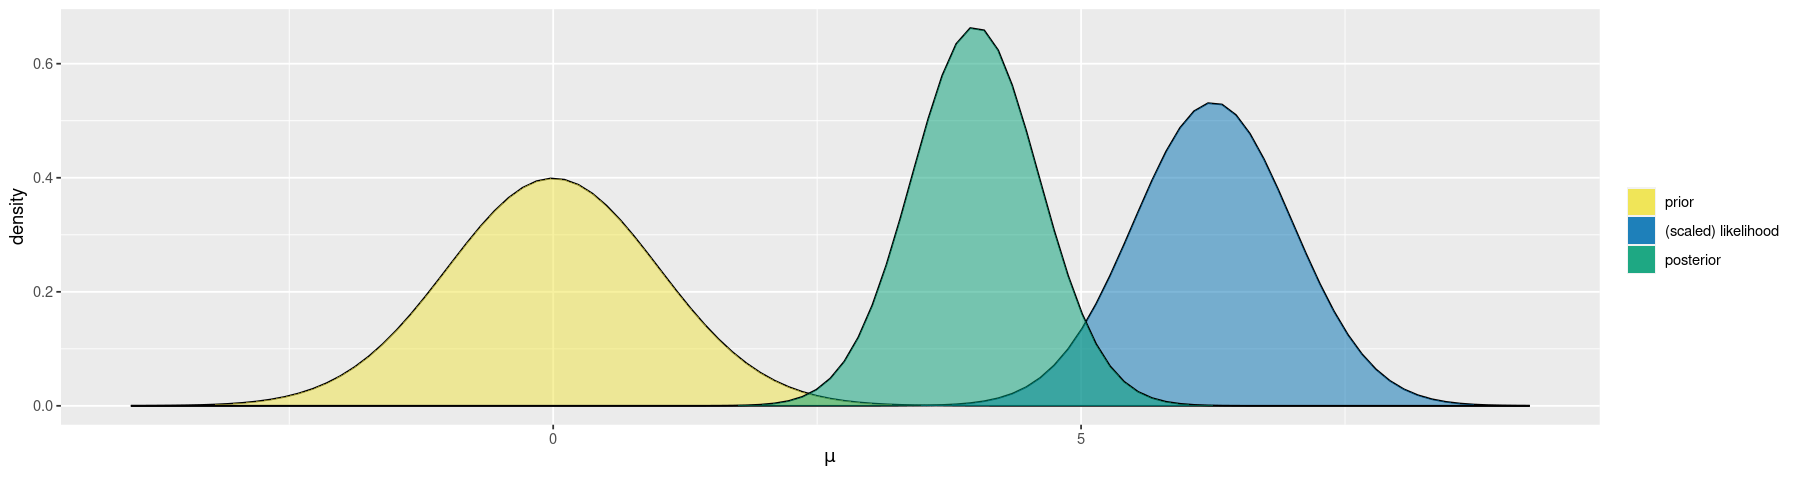

In [32]:
plot_normal_normal( mean=0, sd=1, sigma=0.75, y_bar=6.25, n=1 )

### a)

In [33]:
res_a = mh_tour( N=50, w=50 )

In [34]:
plot_chain <- function( df, title="" ) {
    par(mfrow=c(2,2))
    p1 <- ggplot( df, aes(x=iteration, y=mu) ) + geom_line() + geom_point()
    p2 <- ggplot( df, aes(x=mu) ) +
        geom_histogram( aes(y=..density..), bins=30, color="white" ) +
        stat_function( fun=dnorm, args=list(4, 0.6), color="blue" )
    grid.arrange(p1, p2, ncol=2, top=textGrob(title))
}

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


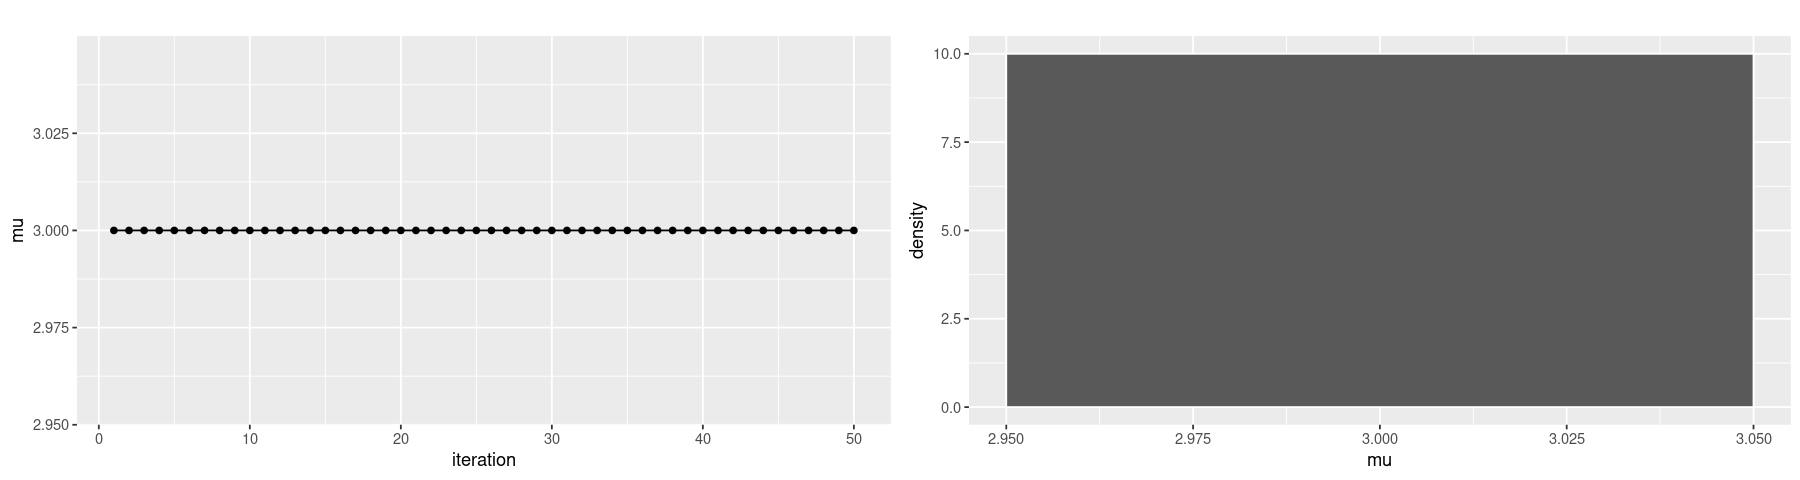

In [35]:
plot_chain(res_a)

$w$ appears to be too large, almost no jumps are accepted. Consequently, only different small parts of the distribution are explored.

### b)

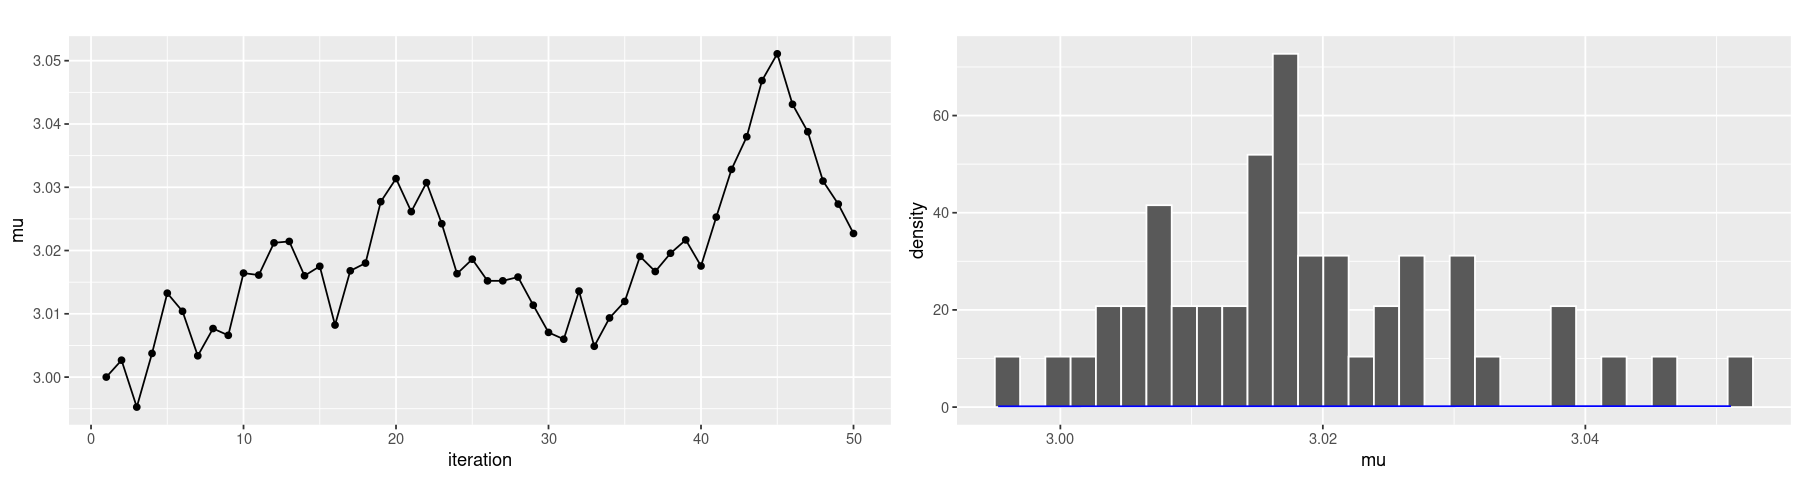

In [36]:
res_b = mh_tour( N=50, w=0.01 )
plot_chain(res_b)

The values in the chain are highly correlated - the chosen value for $w$ appears to be too small. Consequently, only a single small part of the distribution is explored.

### c)

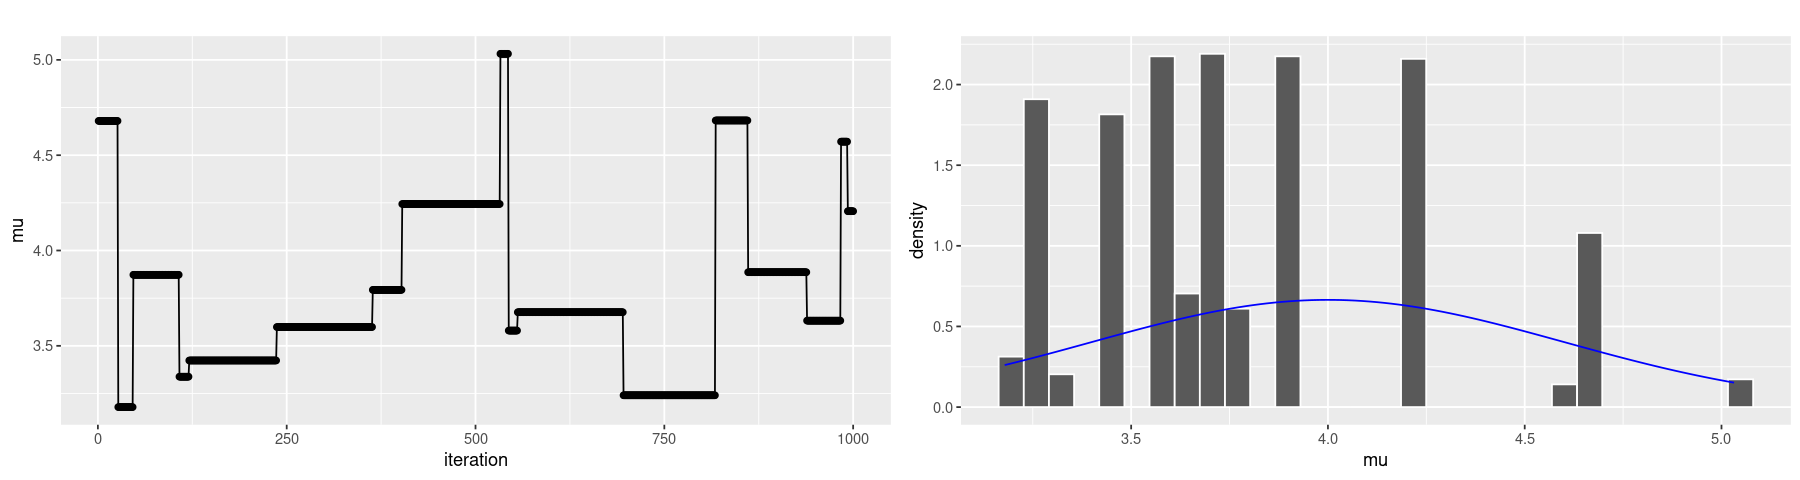

In [37]:
res_c = mh_tour( N=1000, w=50 )
plot_chain(res_c)

Same as in a), now with more iterations. A bit more of the distribution is explored.

### d)

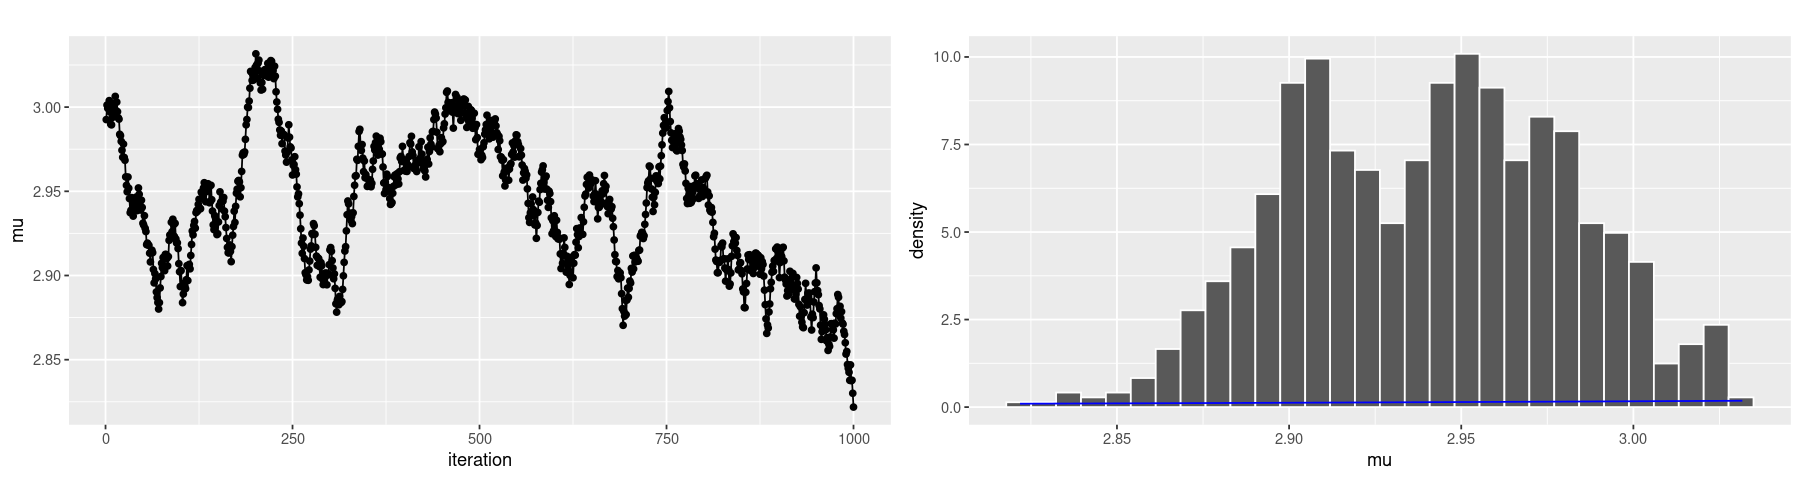

In [38]:
res_c = mh_tour( N=1000, w=0.01 )
plot_chain(res_c)

Same as in b), now with more iterations. A bit more of the patch in the distribution is explored, however not considerably more!

### e)

In a), $w$ is extremely large and the proposals jump usually far away from the mode of the posterior distribution; consequently, almost all jumps are rejected. This results in mostly constant values for $\mu$ with very few jumps. In b), $w$ is extremely small and a large amount of the proposed jumps is accepted (usually the posterior value is higher on one side). However since the jumps are only very small, only a little part of the total posterior distribution is explored.

### f)

If $w$ is too large, the acceptance probability is small. However, if longer chains are run, with time also a considerable amount of reasonably good samples will be available, scaling linearly with $N$. Here for $N=10'000$ steps:

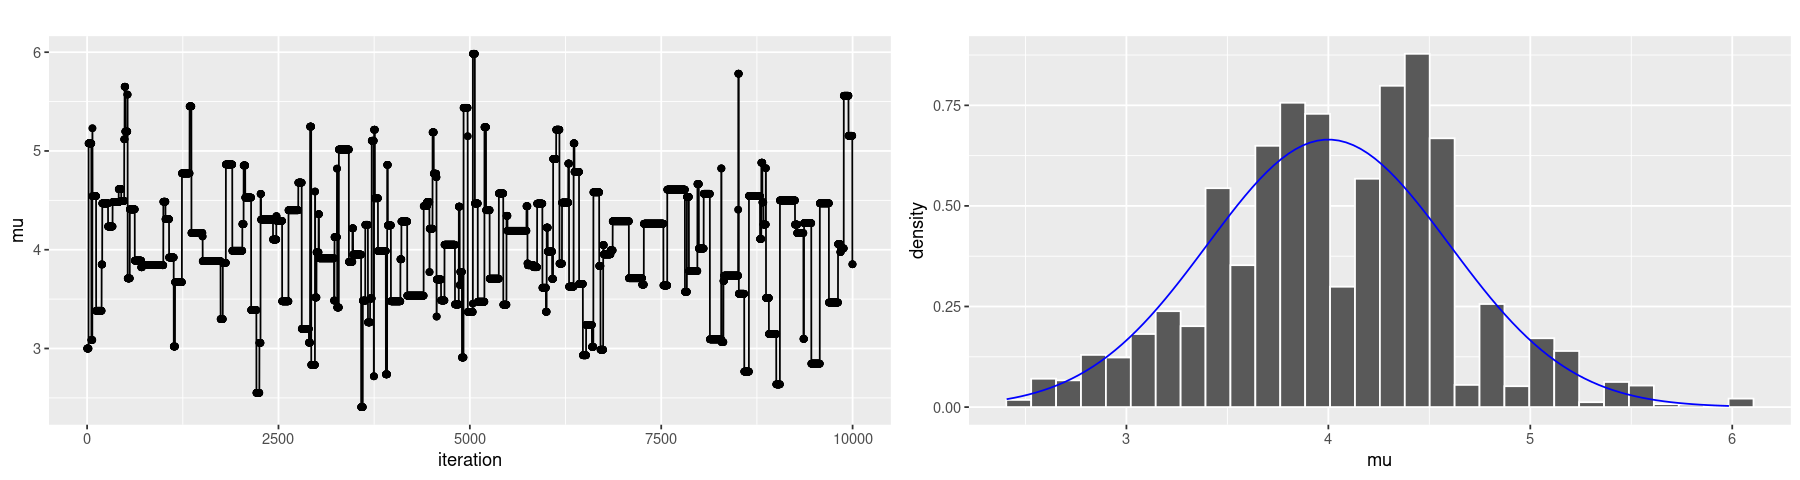

In [39]:
res = mh_tour( N=10000, w=50 )
plot_chain(res)

Still, this is not comparable to a reasonable choice for $w$:

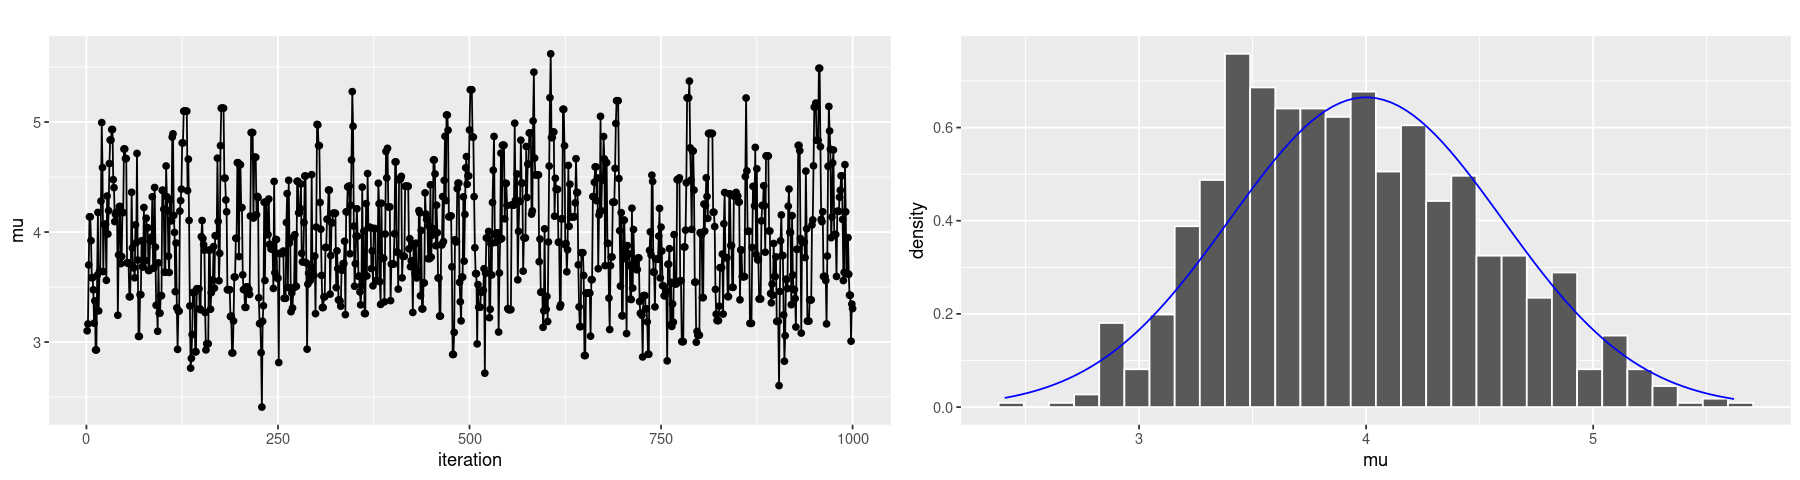

In [40]:
res = mh_tour( N=1000, w=1 )
plot_chain(res)

Adding more iterations for small $w$ does not help that much:

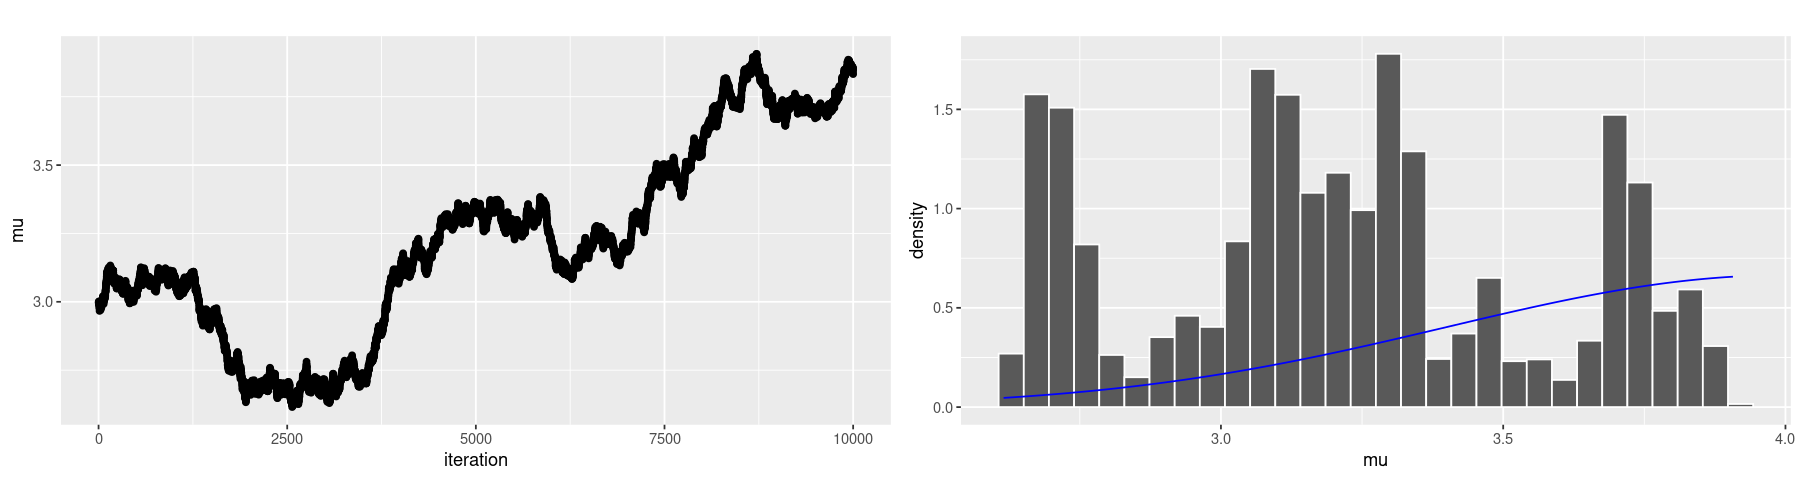

In [41]:
res = mh_tour( N=10000, w=0.01 )
plot_chain(res)

This is essentially a random walk and it is well known that a random walk with $N$ steps typically only covers a distance of $\sqrt{N}$ steps. So it is expected, that the chain only gets $\sqrt{N} \times w$ closer to the mode of the posterior distribution:

In [42]:
sqrt(10000) * 0.01

[1] 1

This is more or less in line with the above plot.

## Exercise 7.11

In [43]:
one_mh_iteration_normal <- function(s, current){
    # STEP 1: Propose the next chain location
     proposal <- rnorm(1, mean=current, sd=s)
  
     # STEP 2: Decide whether or not to go there
     proposal_plaus <- dnorm(proposal, 0, 1) * dnorm(6.25, proposal, 0.75)
     current_plaus  <- dnorm(current, 0, 1) * dnorm(6.25, current, 0.75)
     alpha <- min(1, proposal_plaus / current_plaus)
     next_stop <- sample(c(proposal, current), size = 1, prob = c(alpha, 1-alpha))
  
     # Return the results
     return(data.frame(proposal, alpha, next_stop))
}

### a)

In [44]:
set.seed(1)
one_mh_iteration_normal(s=0.01, current=3)

proposal alpha     next_stop
1 2.993735 0.9826955 2.993735

$s$ is probably too small - small distance covered, high acceptance rates (rerun without fixed seed).

### b)

In [45]:
set.seed(1)
one_mh_iteration_normal(s=0.5, current=3)

proposal alpha     next_stop
1 2.686773 0.3655544 3

$s$ might be just right (rerun without fixed seed).

### c)

In [46]:
set.seed(1)
one_mh_iteration_normal(s=1, current=3)

proposal alpha     next_stop
1 2.373546 0.1017526 3

$s$ might be just right (varying acceptance rates).

### d)

In [47]:
set.seed(1)
one_mh_iteration_normal(s=3, current=3)

proposal alpha        next_stop
1 1.120639 4.002513e-05 3

Extremely small acceptance rates - $s$ might now be too large.

## Exercise 7.12

In [48]:
mh_tour_normal <- function(N, s){
  # 1. Start the chain at location 3
  current <- 3

  # 2. Initialize the simulation
  mu <- rep(0, N)

  # 3. Simulate N Markov chain stops
  for(i in 1:N){    
    # Simulate one iteration
    sim <- one_mh_iteration_normal(s = s, current = current)
    
    # Record next location
    mu[i] <- sim$next_stop
    
    # Reset the current location
    current <- sim$next_stop
  }
  
  # 4. Return the chain locations
  return(data.frame(iteration = c(1:N), mu))
}

### a)

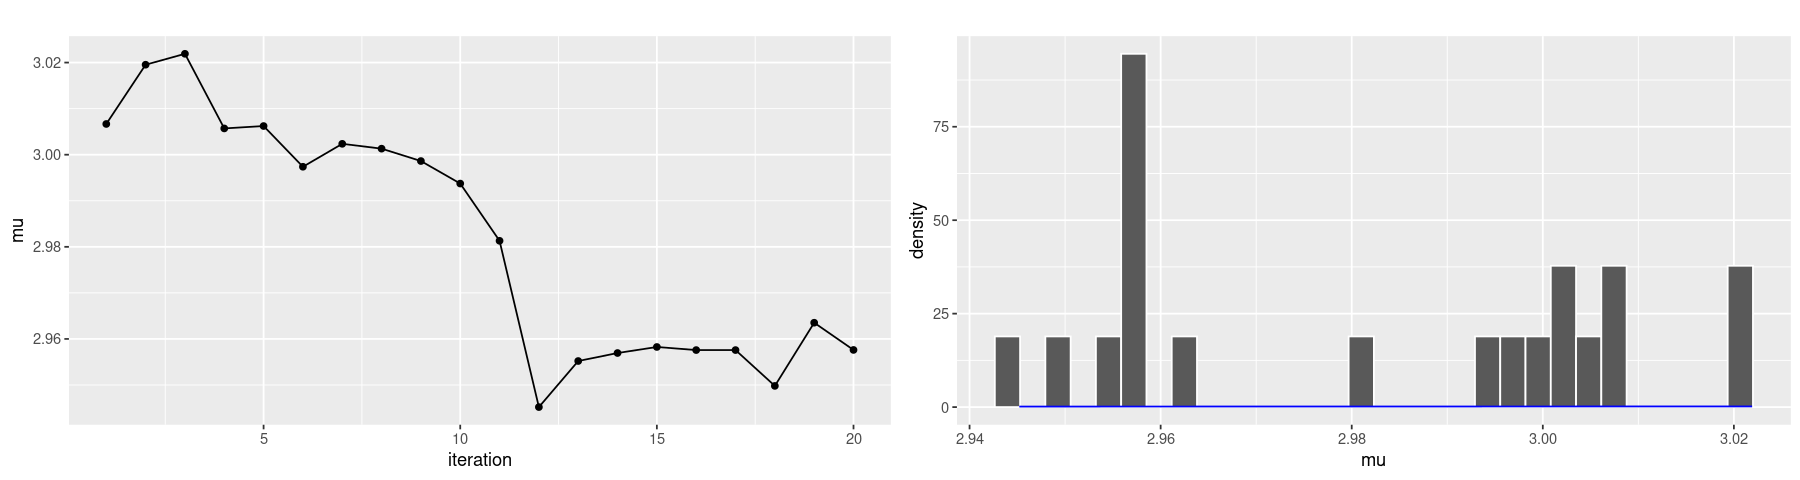

In [49]:
set.seed(84735)
res_a = mh_tour_normal( N=20, s=0.01 )
plot_chain( res_a )

### b)

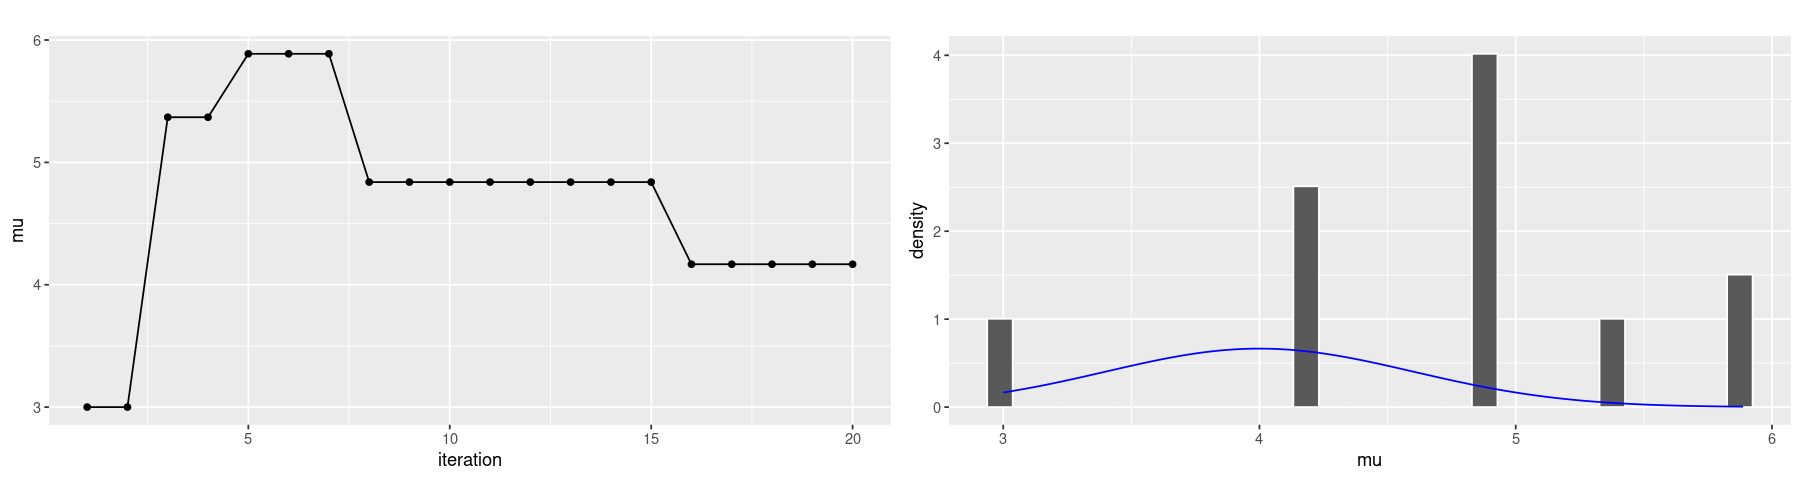

In [50]:
set.seed(84735)
res_b = mh_tour_normal( N=20, s=10 )
plot_chain( res_b )

### c)

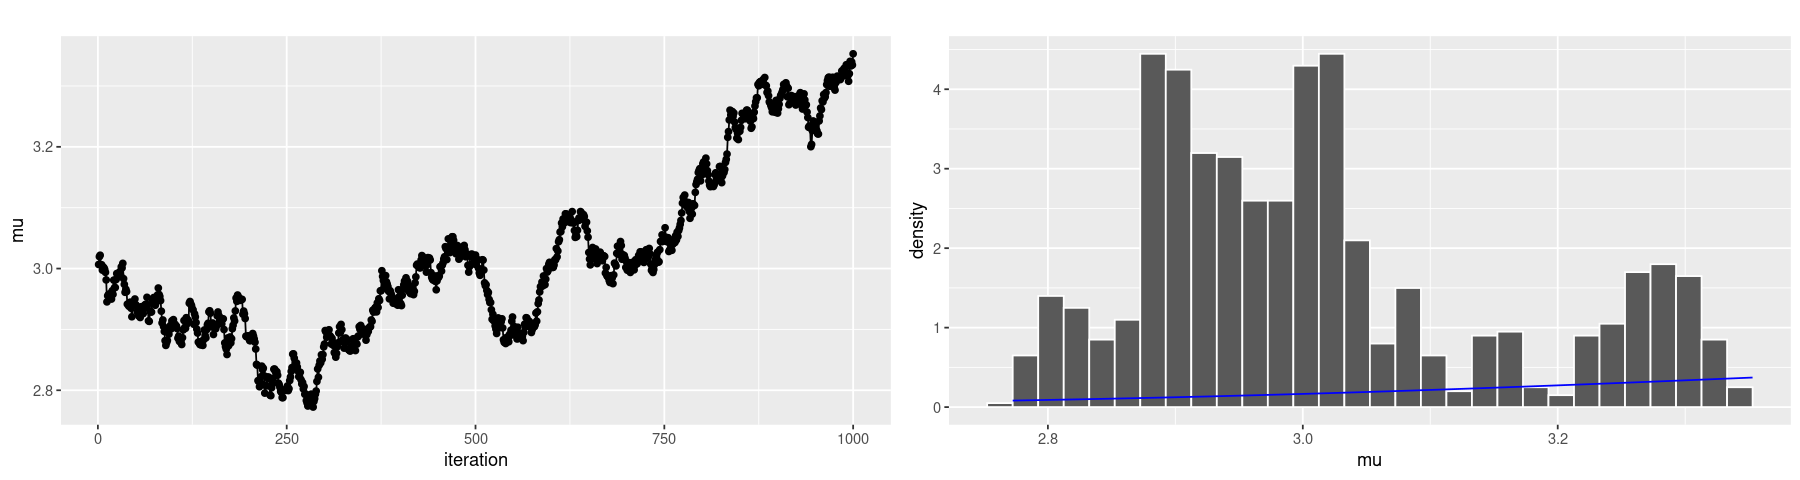

In [51]:
set.seed(84735)
res_c = mh_tour_normal( N=1000, s=0.01 )
plot_chain( res_c )

### d)

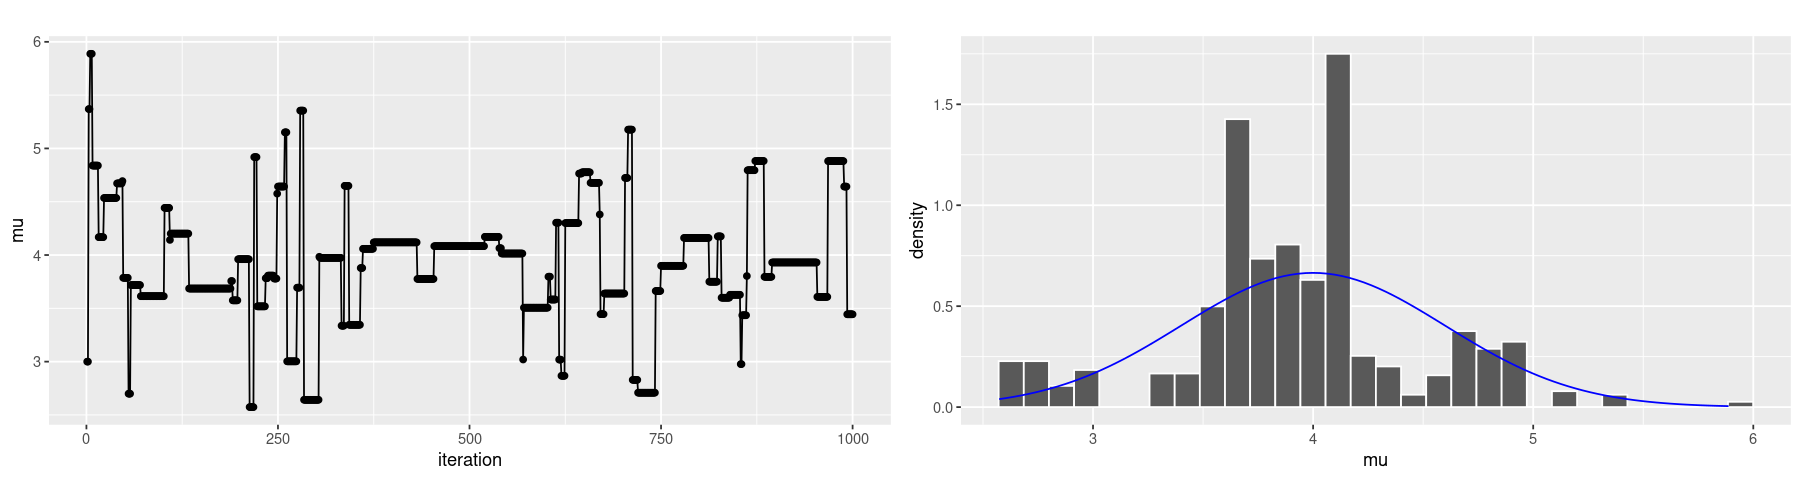

In [52]:
set.seed(84735)
res_c = mh_tour_normal( N=1000, s=10 )
plot_chain( res_c )

### e)

Similarly to exercise 7.11, $s=0.01$ is too small (producing a highly correlated chain that only explores a small part of the posterior distribution) and $s=10$ is too large (leading to a very low acceptance rate and exploring the posterior only at a very sparse number of points). The results for a higher number of iterations is qualitatively different to exercise 7.11. Using more iterations helps a bit for too large values of $s$, but only provides very minor improvements for too small values of $s$.

### f)

Grid search:

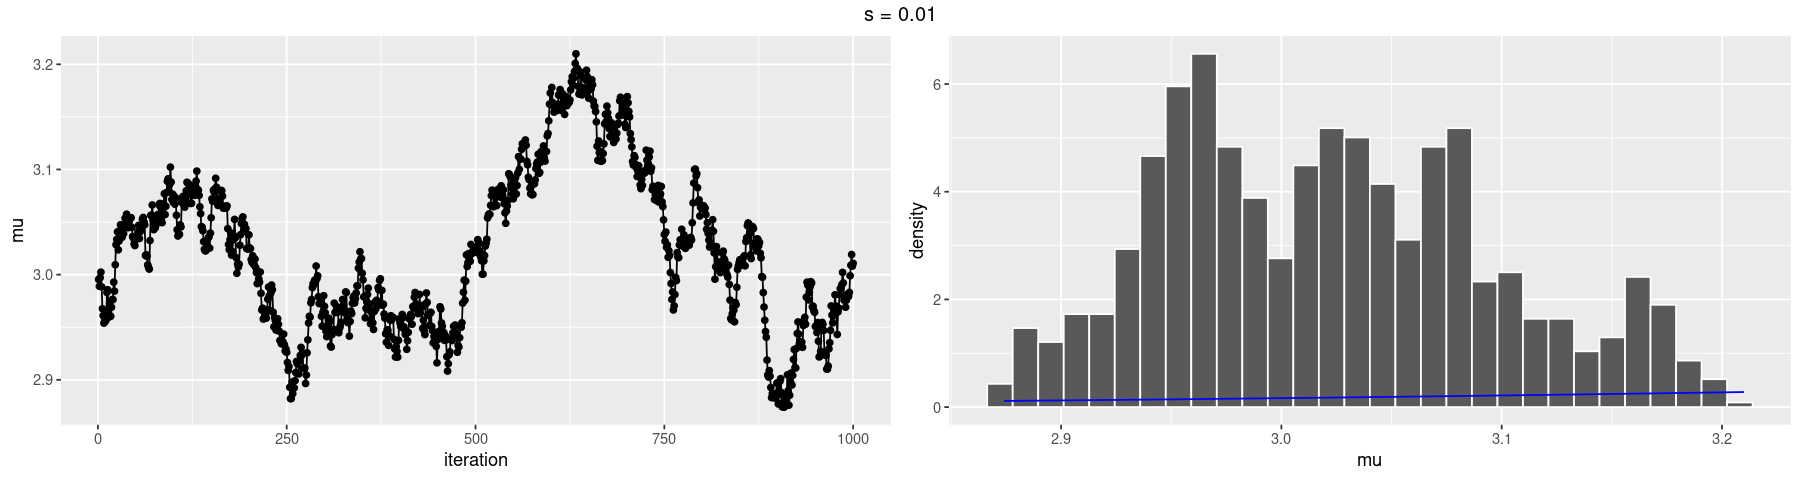

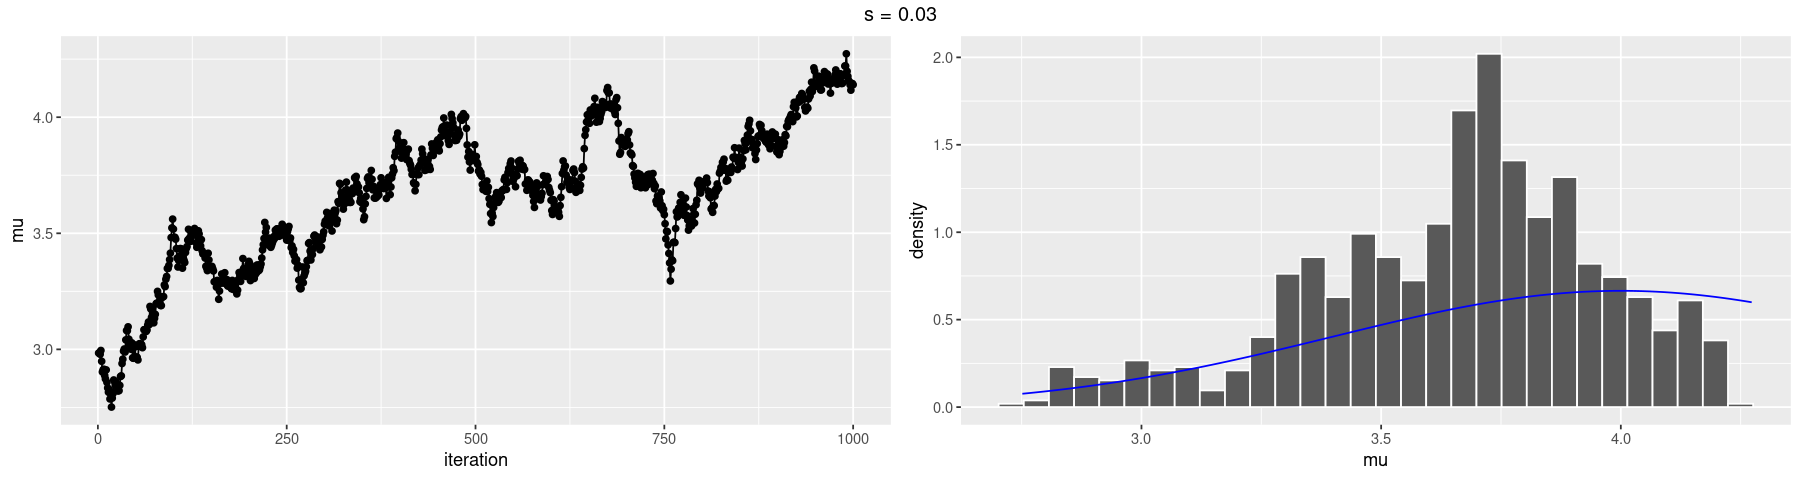

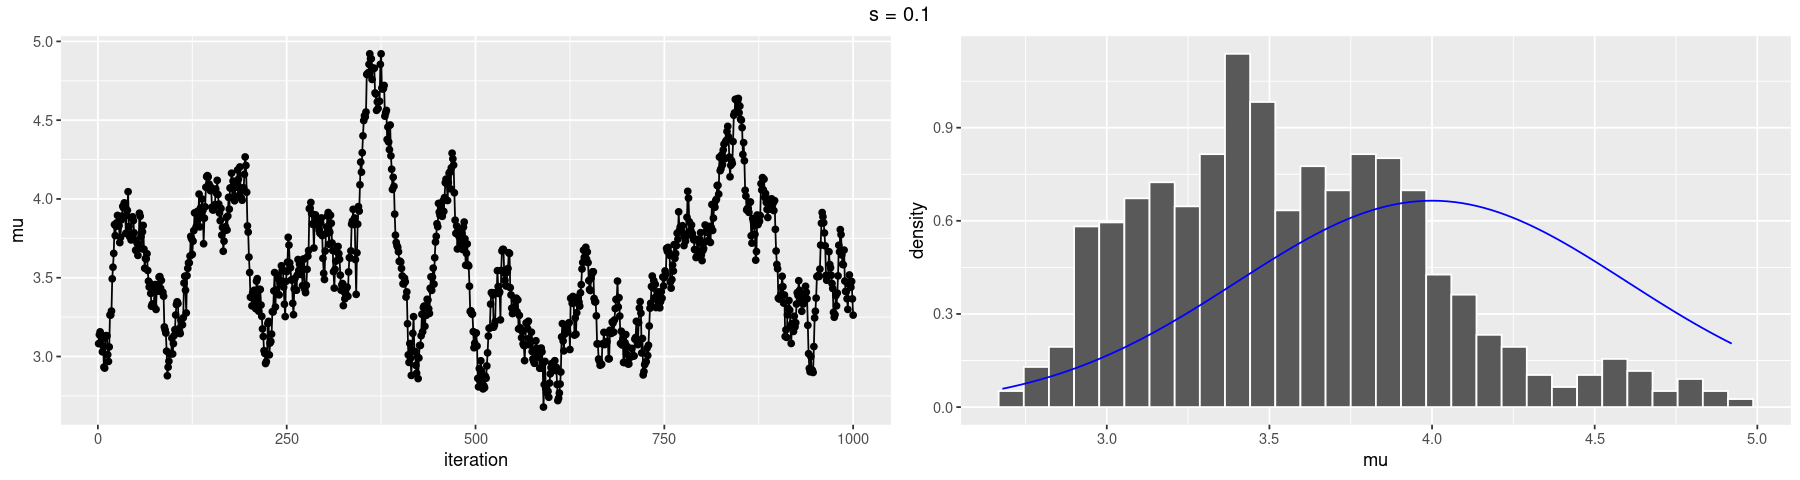

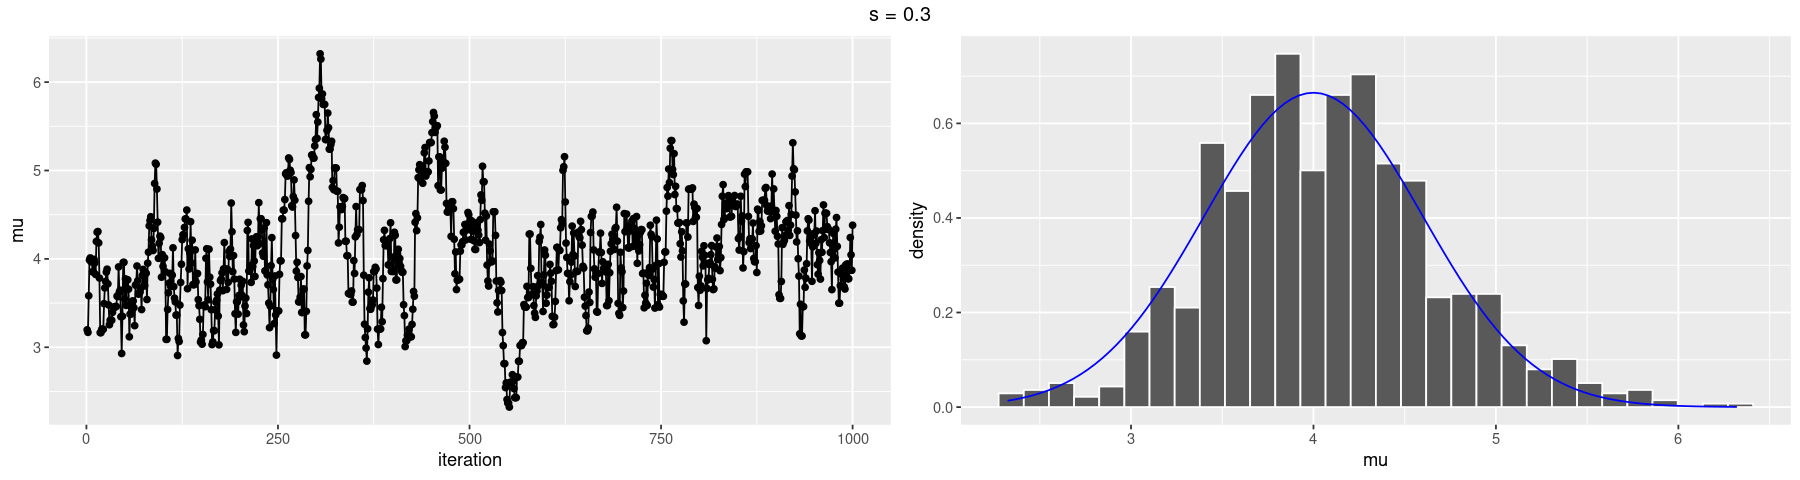

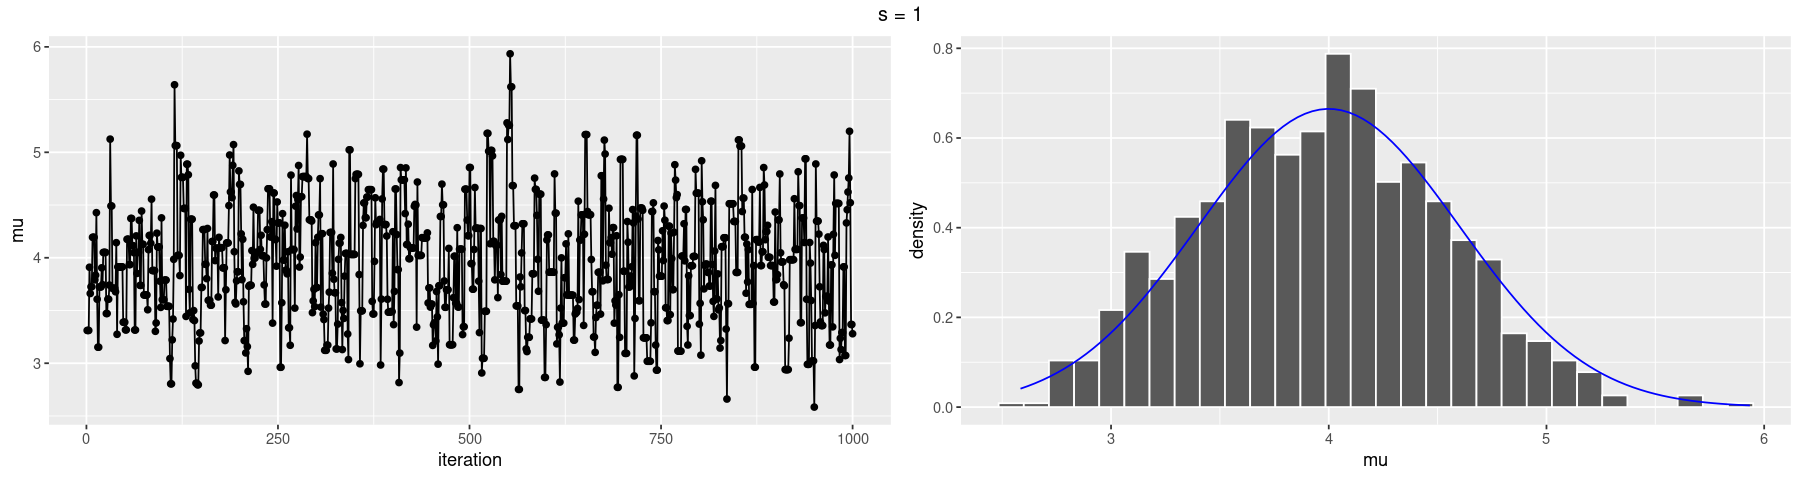

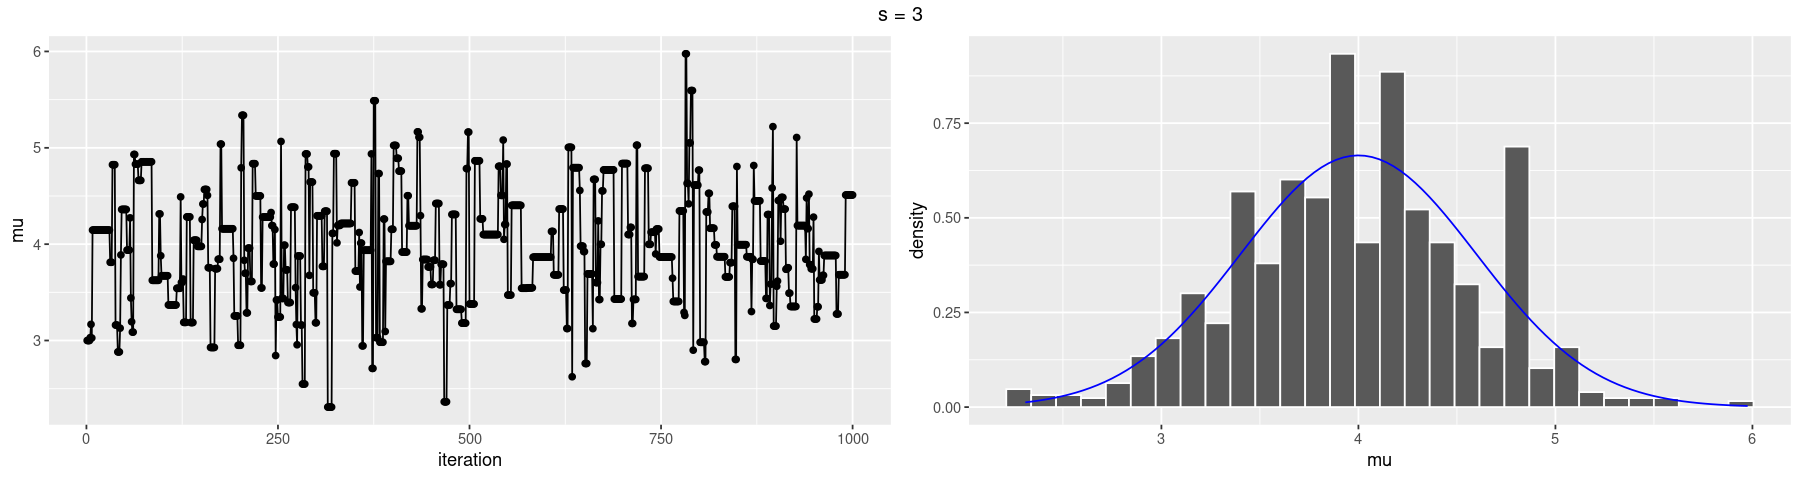

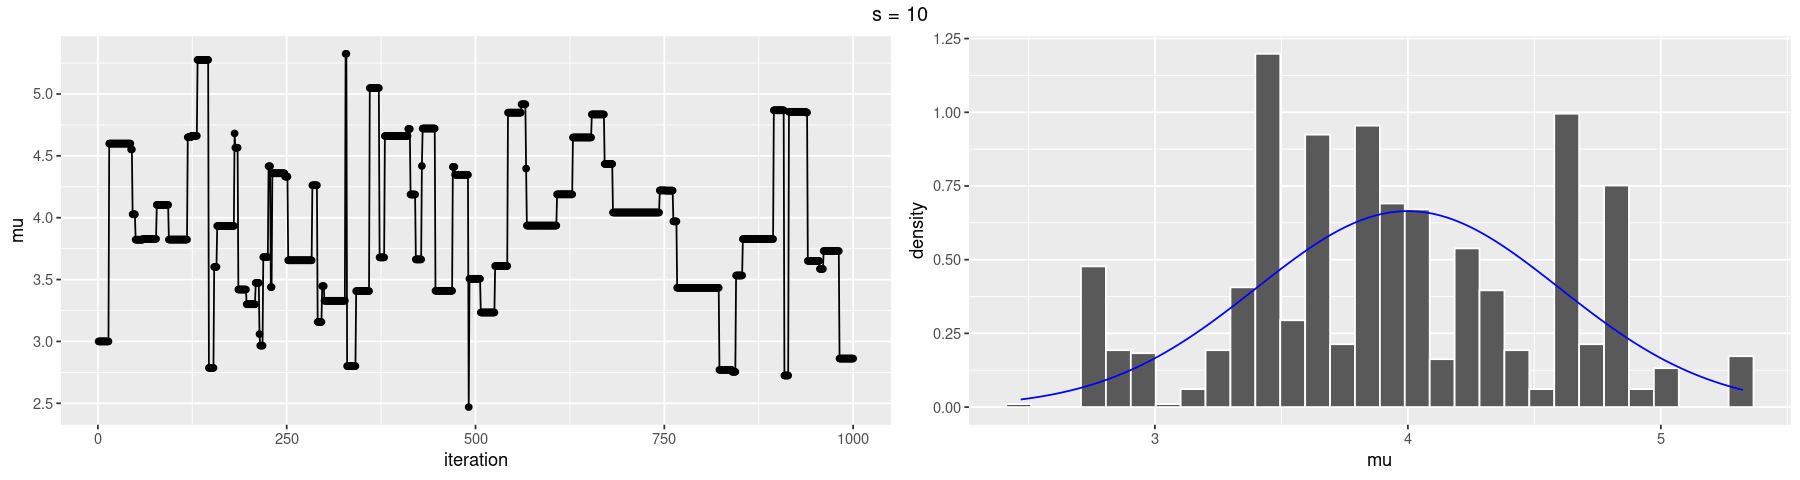

In [53]:
for( s in c(0.01,0.03,0.1,0.3,1,3,10) ) { 
    res = mh_tour_normal( N=1000, s=s )
    plot_chain( res, title=paste0("s = ", s, collapse = "") )
}

A value around $s=0.3$ seems reasonable. Explore this part of the grid a bit:

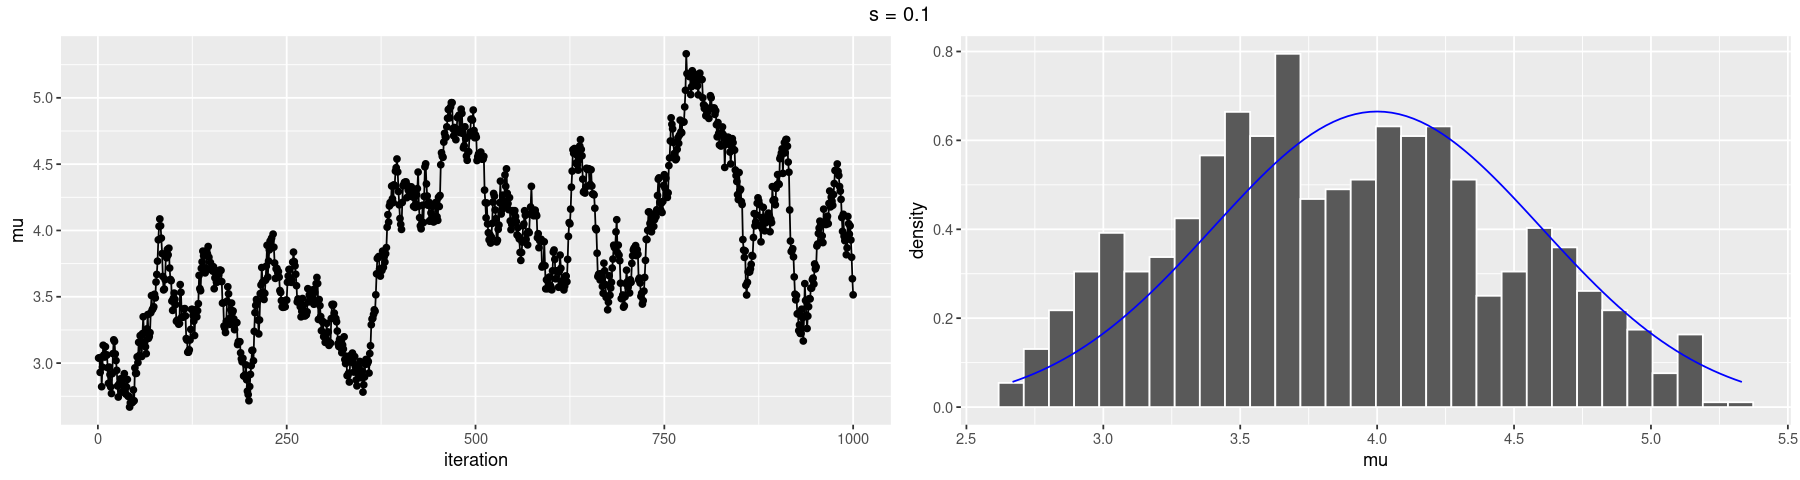

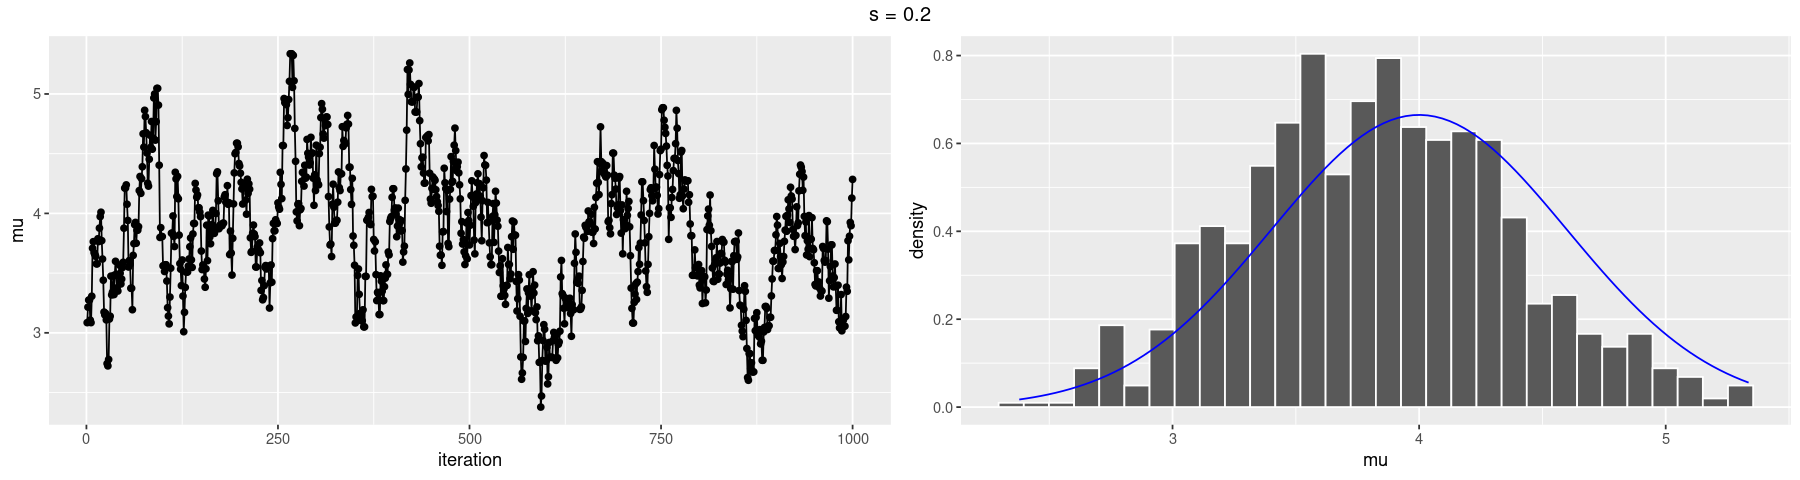

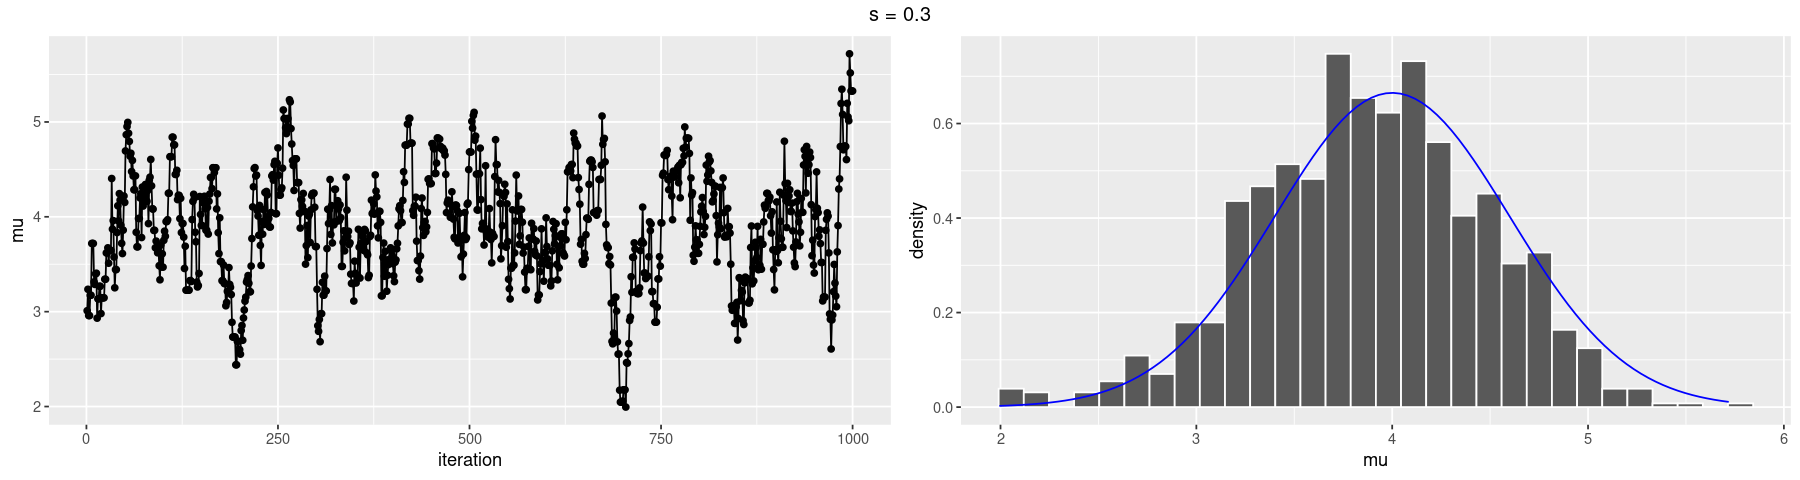

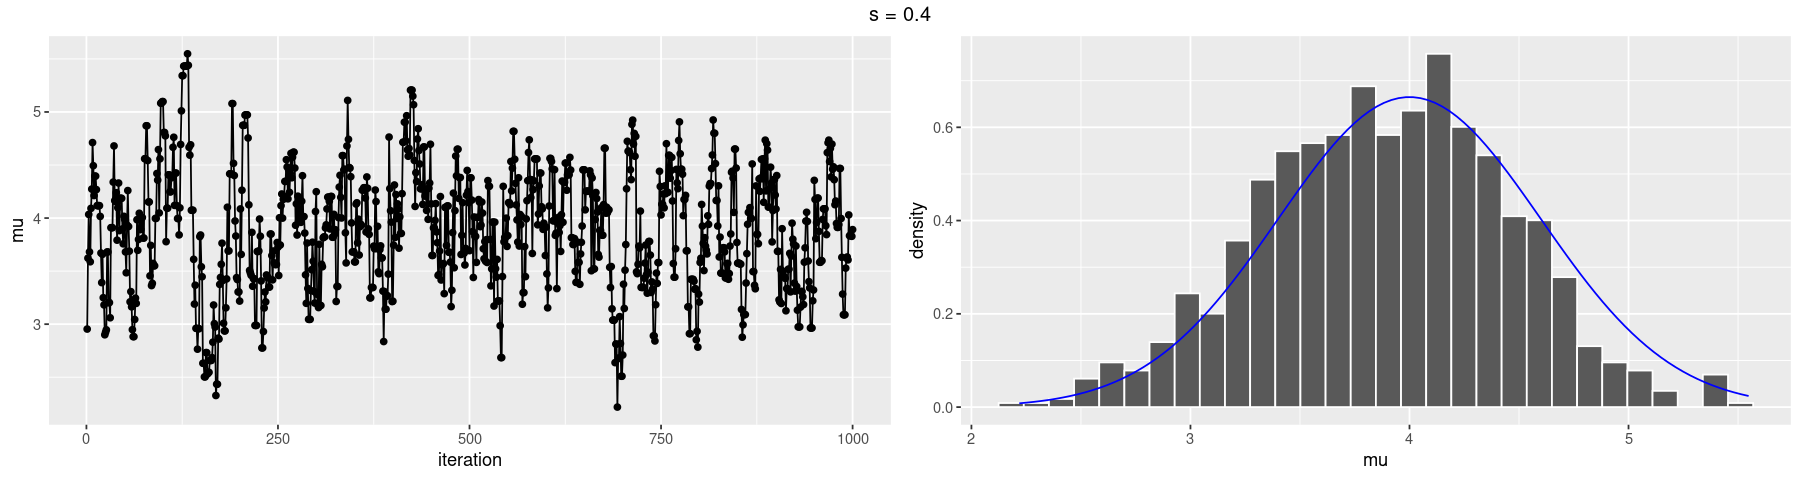

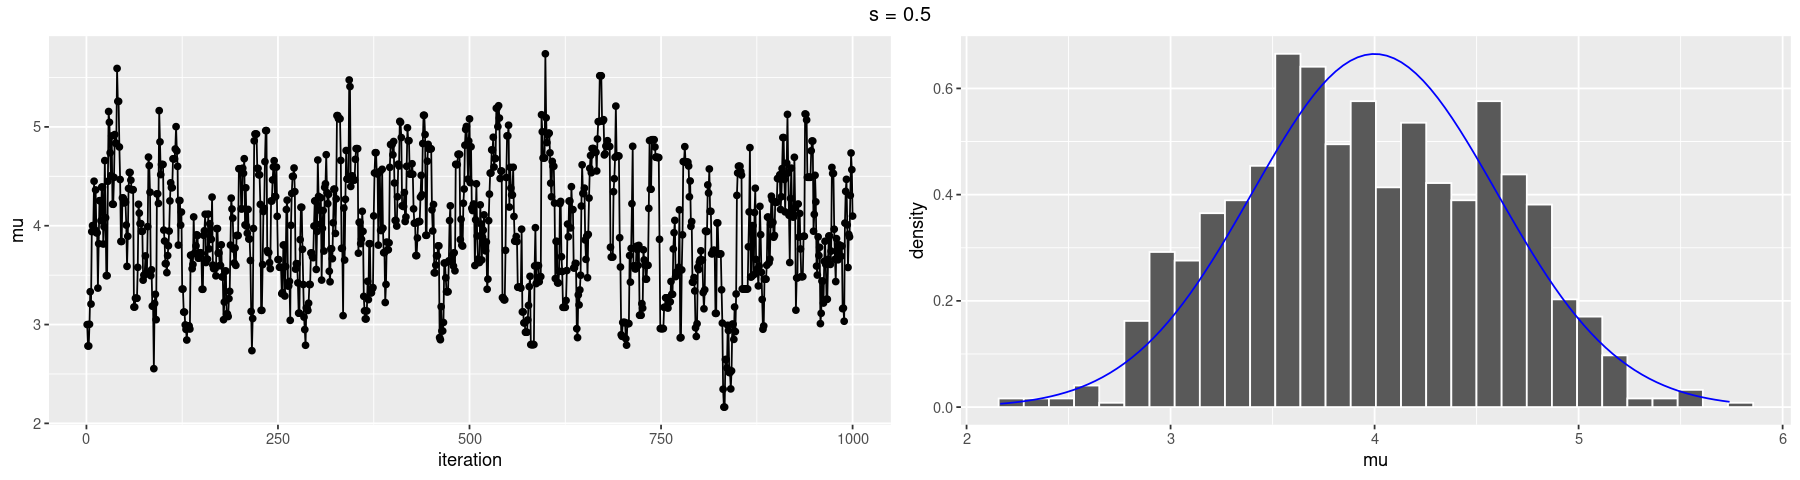

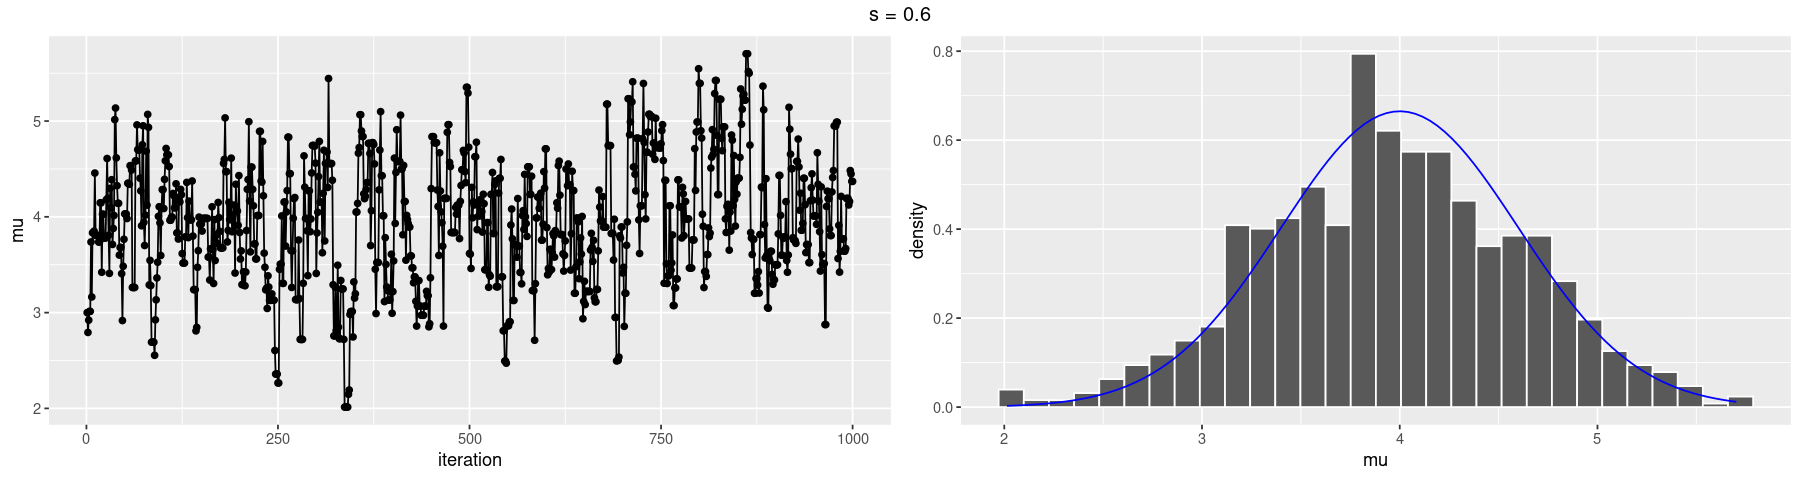

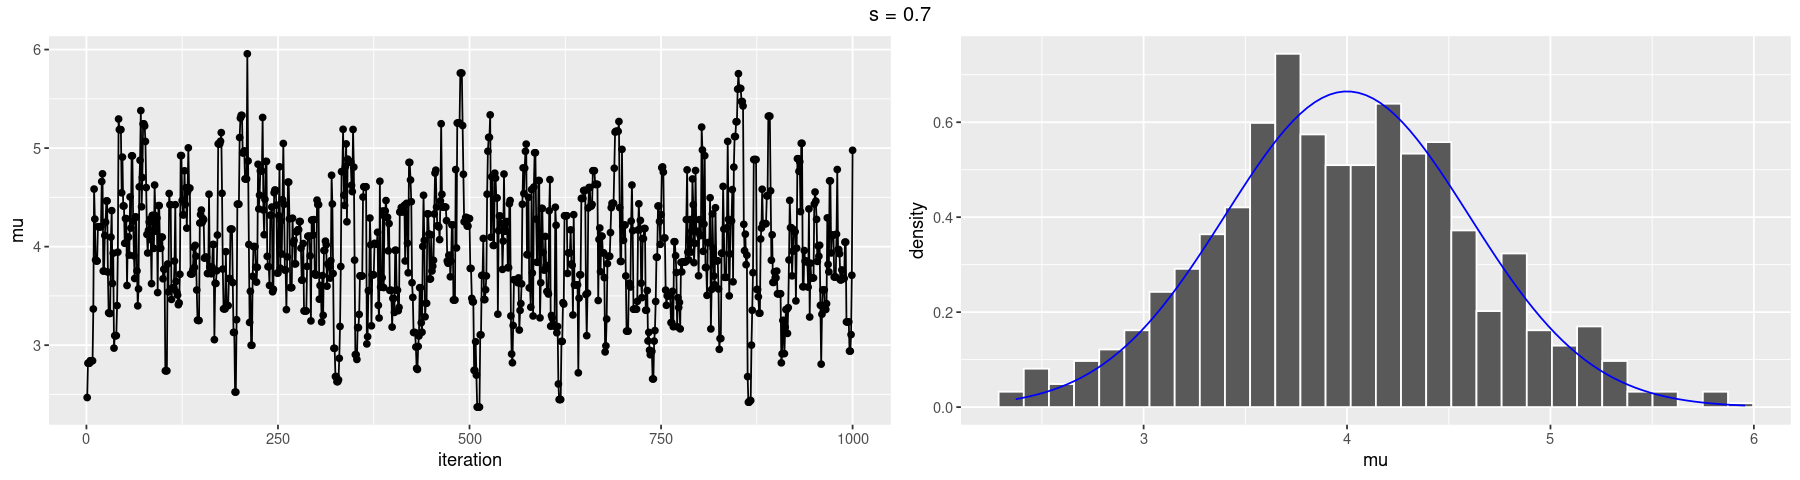

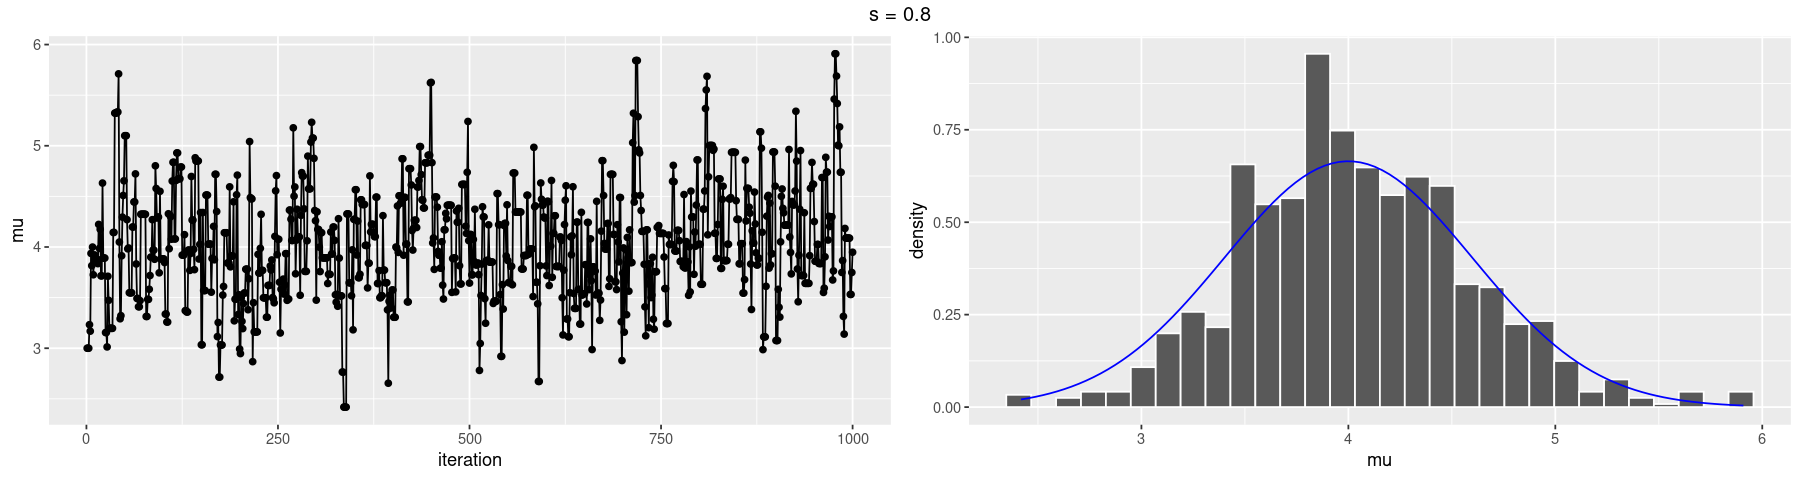

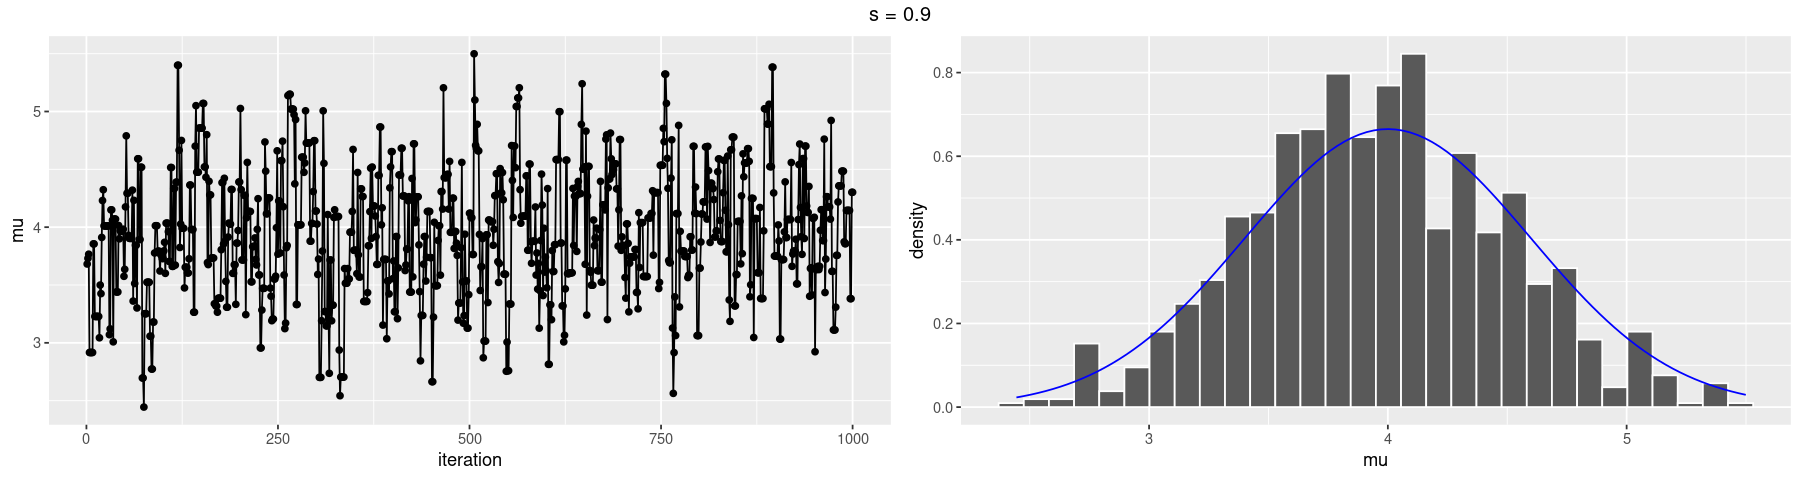

In [54]:
for( s in c(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9) ) { 
    res = mh_tour_normal( N=1000, s=s )
    plot_chain( res, title=paste0("s = ", s, collapse = "") )
}

Most approximations with $s>0.3$ look more or less reasonable for the limit number of iterations.

## Exercise 7.13

In [55]:
new_mh_iteration <- function(w, current, m, s){
    # STEP 1: Propose the next chain location
     proposal <- runif(1, min = current - w, max = current + w)
  
     # STEP 2: Decide whether or not to go there
     proposal_plaus <- dnorm(proposal, m, s) * dnorm(6.25, proposal, 0.75)
     current_plaus  <- dnorm(current, m, s) * dnorm(6.25, current, 0.75)
     alpha <- min(1, proposal_plaus / current_plaus)
     next_stop <- sample(c(proposal, current), size = 1, prob = c(alpha, 1-alpha))
  
     # Return the results
     return(data.frame(proposal, alpha, next_stop))
}

### a)

In [56]:
set.seed(84735)
new_mh_iteration(w=1, current=3, m=0, s=10)

proposal alpha next_stop
1 3.495377 1     3.495377

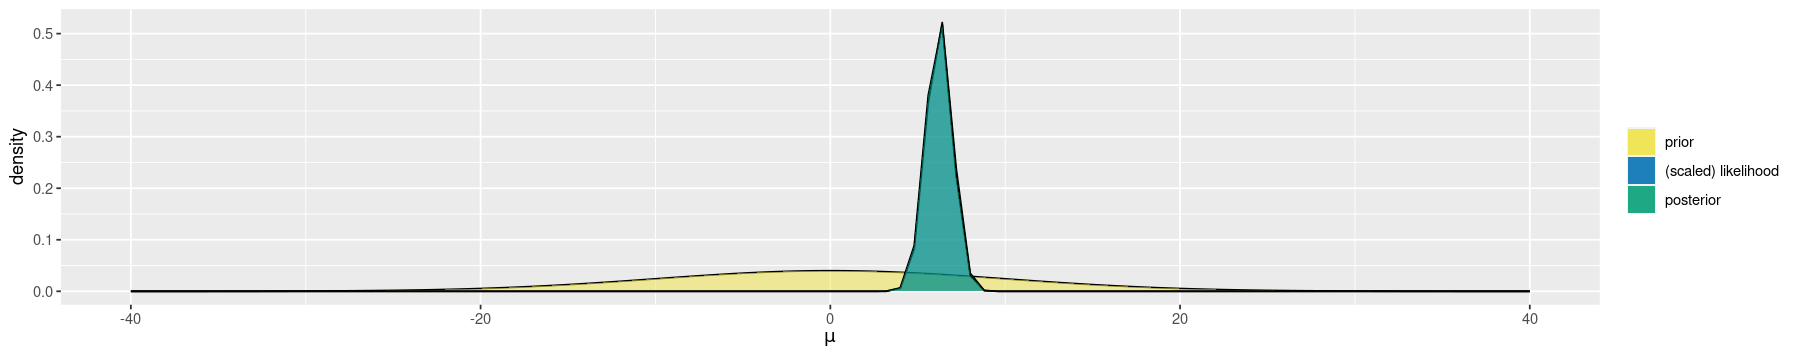

In [57]:
options(repr.plot.width=15, repr.plot.height=3)
plot_normal_normal(mean=0, sd=10, n=1, y_bar=6.25, sigma=0.75)

In [58]:
summarize_normal_normal(mean=0, sd=10, n=1, y_bar=6.25, sigma=0.75)

model     mean    mode    var         sd        
1 prior     0.00000 0.00000 100.0000000 10.0000000
2 posterior 6.21504 6.21504   0.5593536  0.7478995

The proposed value is closer to the posterior mode and consequently accepted.

### b)

In [59]:
set.seed(84735)
new_mh_iteration(w=1, current=3, m=20, s=1)

proposal alpha next_stop
1 3.495377 1     3.495377

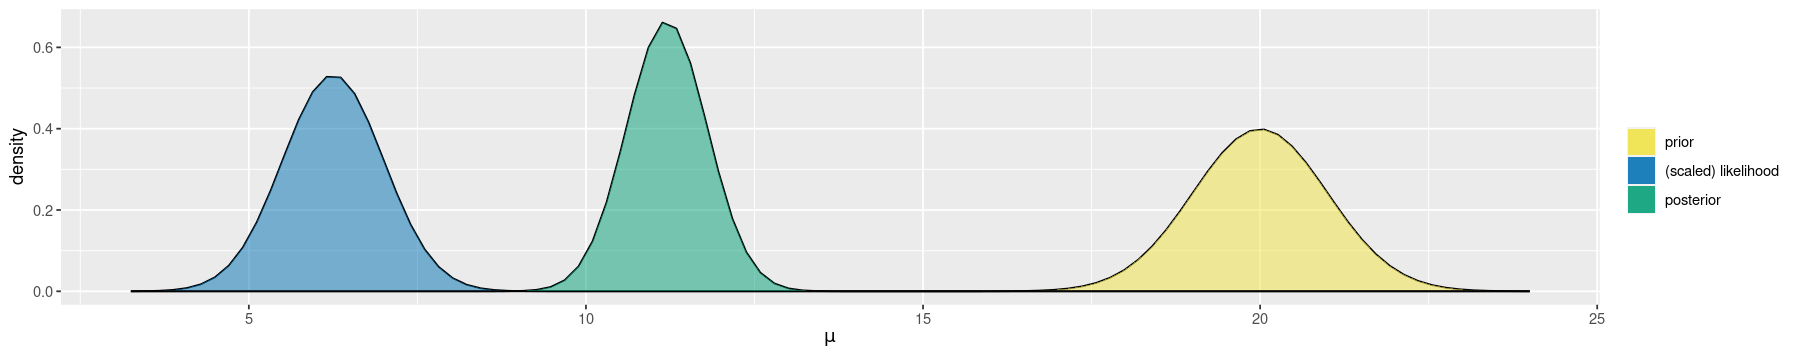

In [60]:
plot_normal_normal(mean=20, sd=1, n=1, y_bar=6.25, sigma=0.75)

In [61]:
summarize_normal_normal(mean=20, sd=1, n=1, y_bar=6.25, sigma=0.75)

model     mean mode var  sd 
1 prior     20.0 20.0 1.00 1.0
2 posterior 11.2 11.2 0.36 0.6

The (same) proposed value is still closer to the posterior mode (even if it's a bit further away now) and consequently it is accepted.

### c)

In [62]:
set.seed(84735)
new_mh_iteration(w=0.1, current=3, m=20, s=1)

proposal alpha next_stop
1 3.049538 1     3.049538

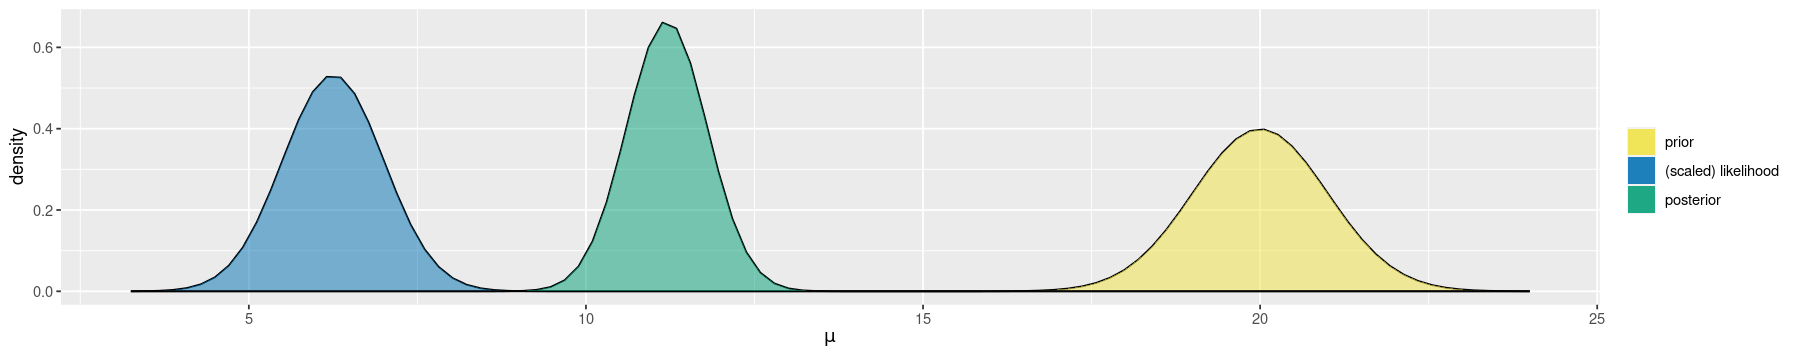

In [63]:
plot_normal_normal(mean=20, sd=1, n=1, y_bar=6.25, sigma=0.75)

In [64]:
summarize_normal_normal(mean=20, sd=1, n=1, y_bar=6.25, sigma=0.75)

model     mean mode var  sd 
1 prior     20.0 20.0 1.00 1.0
2 posterior 11.2 11.2 0.36 0.6

Similar to c), the sampled value is closer to the posterior mode and accepted. However it will take much longer to reach the posterior mode, since $w$ is 10 times smaller.

### d)

In [65]:
set.seed(84735)
new_mh_iteration(w=0.1, current=3, m=-15, s=10)

proposal alpha next_stop
1 3.049538 1     3.049538

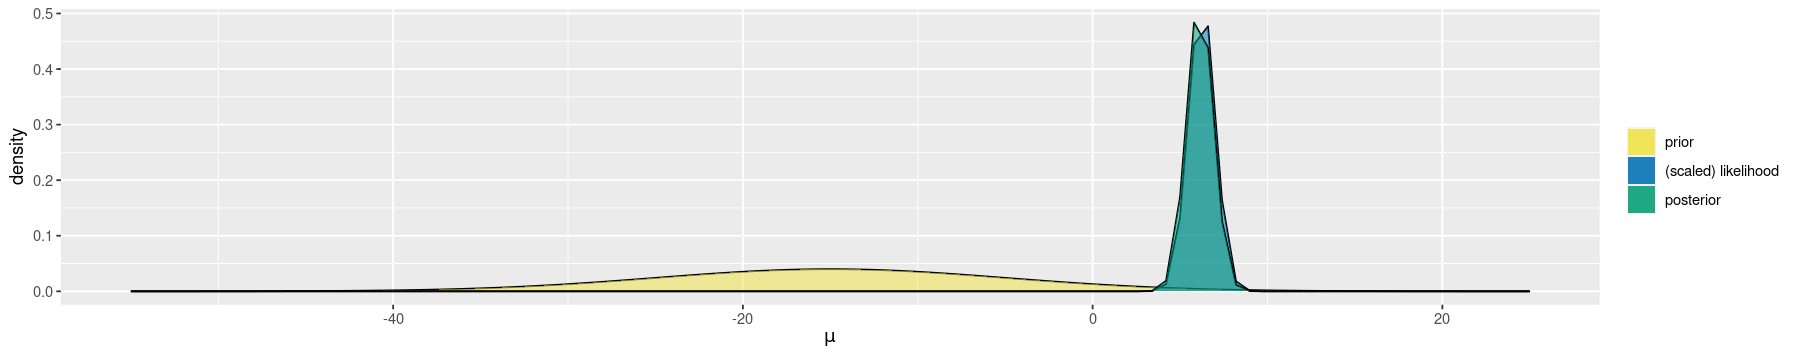

In [66]:
plot_normal_normal(mean=-15, sd=10, n=1, y_bar=6.25, sigma=0.75)

In [67]:
summarize_normal_normal(mean=-15, sd=10, n=1, y_bar=6.25, sigma=0.75)

model     mean       mode       var         sd        
1 prior     -15.000000 -15.000000 100.0000000 10.0000000
2 posterior   6.131137   6.131137   0.5593536  0.7478995

The sampled value is closer to the posterior mode and, consequently, also accepted.

The priors with $s=10$ are extremely vague and the posterior is dominated by the measured data. The priors with $s=1$ are a bit more informative and the balancing of the posterior between prior and likelihood is better visible.

## Exercise 7.14

$\lambda \sim \text{Gamma}(1, 0.1)$

$\lambda|Y \sim \text{Pois}(\lambda)$

### a)

Since $\lambda>0$ can be arbitrary large, sampling from a Beta distribution (values between 0-1) or sampling from a normal distribution (non-zero probabilities for negative values) is not an option. Consequently, an exponential distribution with PDF

$$
p(\lambda) = \alpha\, e^{-\alpha x}
$$

is used, which samples any value of $\lambda > 0$. The choice of $\alpha$ will be discussed in b).

### b)

Closed-form posterior:

In [68]:
summarize_gamma_poisson( shape=1, rate=0.1, sum_y=4, n=1  )

model     shape rate mean      mode     var        sd       
1 prior     1     0.1  10.000000 0.000000 100.000000 10.000000
2 posterior 5     1.1   4.545455 3.636364   4.132231  2.032789

Implement Metropolis-Hastings:

In [69]:
gp_mh_iteration <- function(alpha, current){
    # STEP 1: Propose the next chain location
     proposal <- rexp(1, rate=alpha)
  
     # STEP 2: Decide whether or not to go there
     proposal_plaus <- dgamma(proposal, 1, 0.1) * dpois(4, proposal)
     current_plaus  <- dgamma(current, 1, 0.1) * dpois(4, current)
     alpha <- min(1, proposal_plaus / current_plaus)
     next_stop <- sample(c(proposal, current), size = 1, prob = c(alpha, 1-alpha))
  
     # Return the results
     return(data.frame(proposal, alpha, next_stop))
}

In [70]:
mh_tour_gp <- function(N, alpha){
  # 1. Start the chain at location 3
  current <- 3

  # 2. Initialize the simulation
  mu <- rep(0, N)

  # 3. Simulate N Markov chain stops
  for(i in 1:N){    
    # Simulate one iteration
    sim <- gp_mh_iteration(alpha = alpha, current = current)
    
    # Record next location
    mu[i] <- sim$next_stop
    
    # Reset the current location
    current <- sim$next_stop
  }
  
  # 4. Return the chain locations
  return(data.frame(iteration = c(1:N), mu))
}

Compute and visualize chains:

In [71]:
plot_chain <- function( df, title="" ) {
    par(mfrow=c(2,2))
    p1 <- ggplot( df, aes(x=iteration, y=mu) ) + geom_line() + geom_point()
    p2 <- ggplot( df, aes(x=mu) ) +
        geom_histogram( aes(y=..density..), bins=30, color="white" ) +
        stat_function( fun=dgamma, args=list(5, 1.1), color="blue" )
    grid.arrange(p1, p2, ncol=2, top=textGrob(title))
}

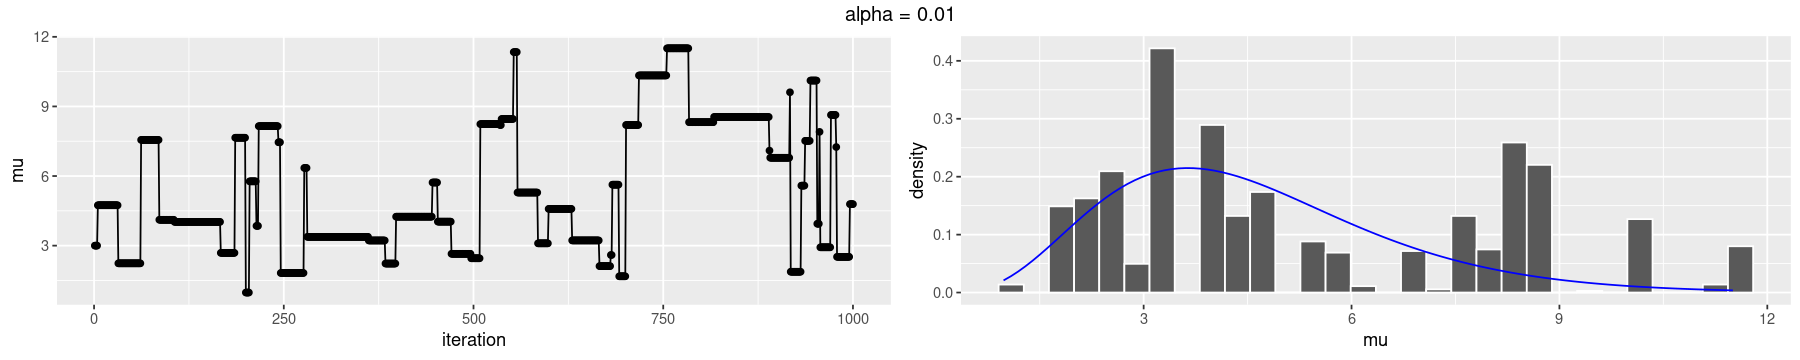

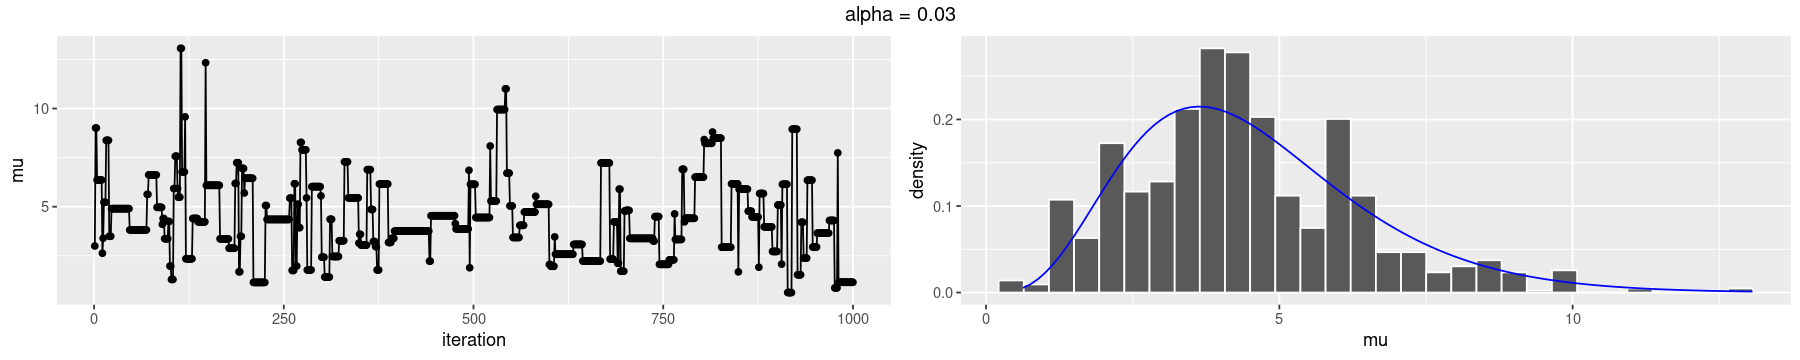

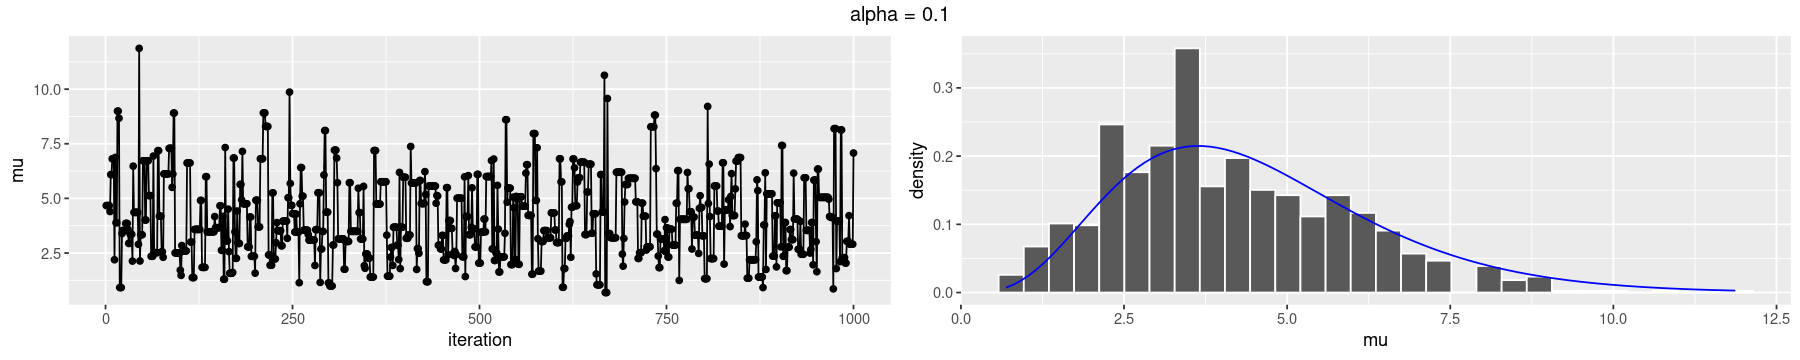

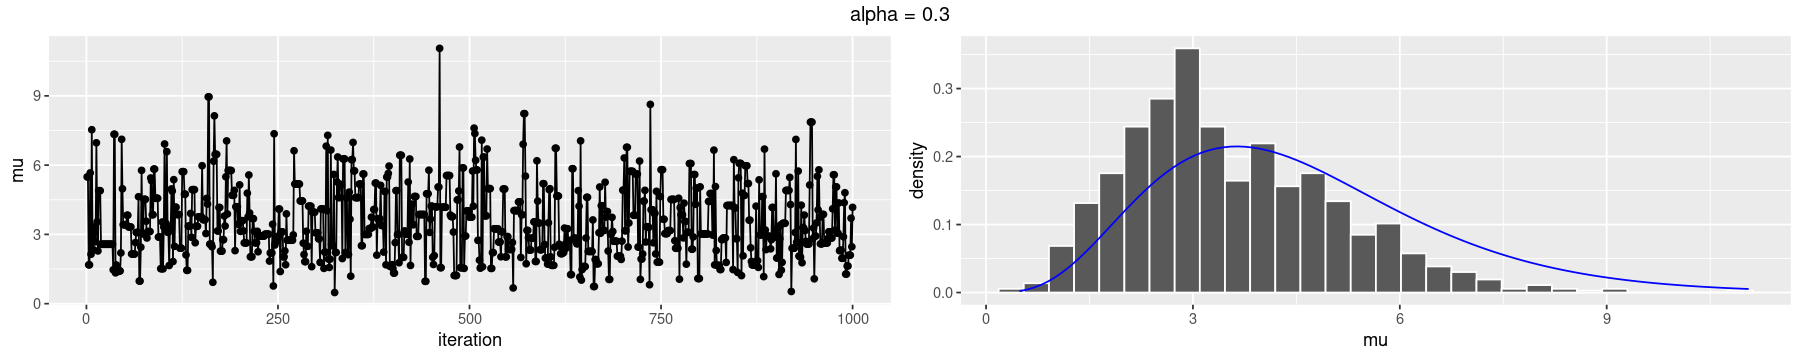

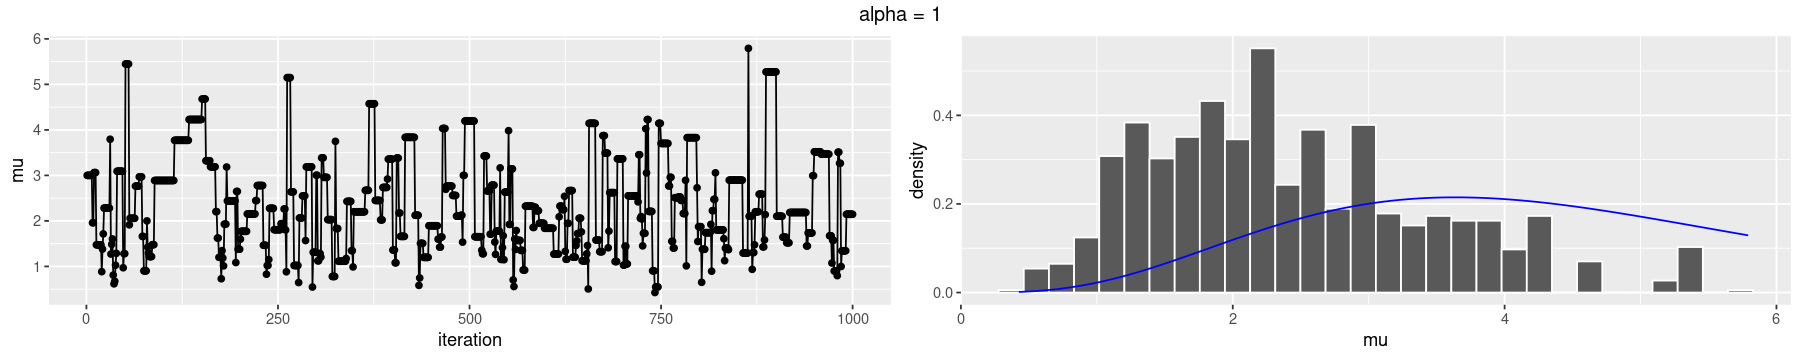

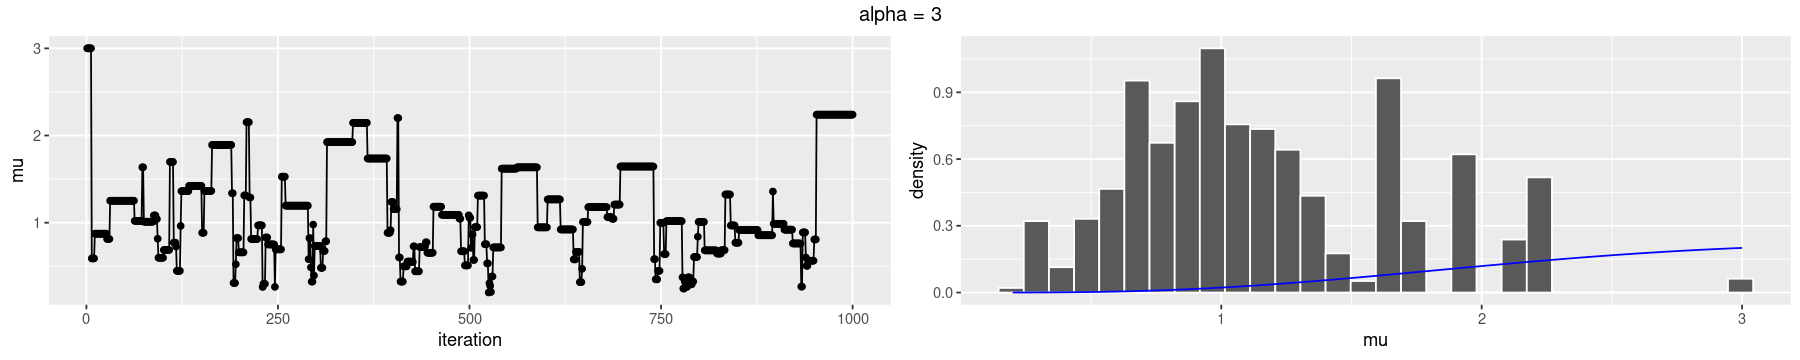

In [72]:
for( alpha in c(0.01,0.03,0.1,0.3,1,3) ) {
    res <- mh_tour_gp( 1000, alpha )
    plot_chain( res, title=paste0("alpha = ", alpha, collapse="") )
}

Reasonable values seem to be around $\alpha=0.1$. With a bit more iterations:

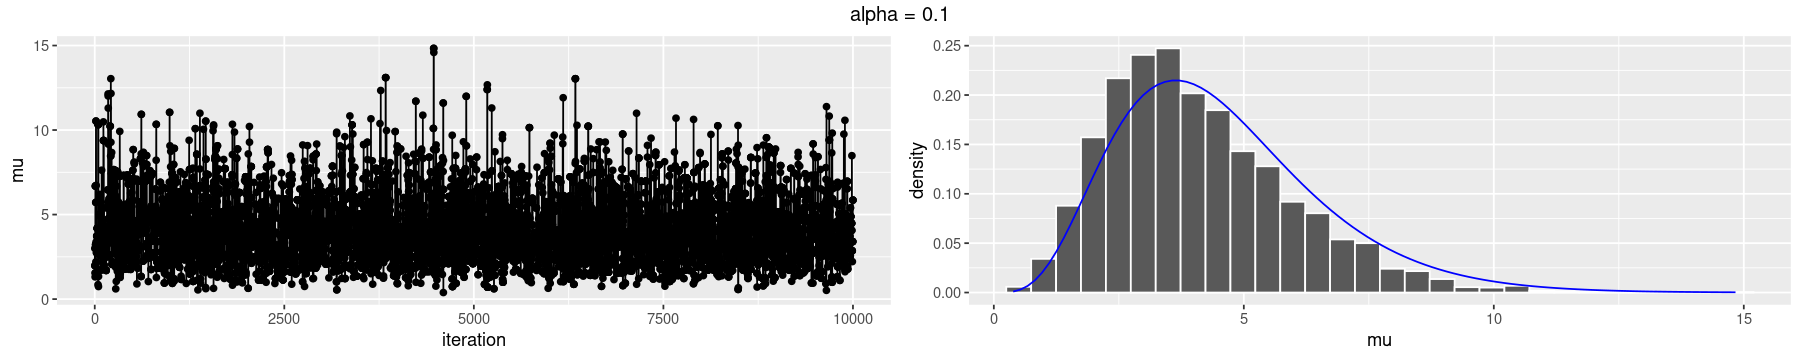

In [73]:
res <- mh_tour_gp( 10000, alpha=0.1 )
plot_chain( res, title=paste0("alpha = ", 0.1, collapse="") )